<img src="./ORS_img/ors_logo.jpg" width="350"/>

# Analyse de données de la pandémie: Évolution du COVID-19.

**By Hani Bounoua, Souhil Zaida**

Dans cet atelier, nous allons explorer des données ajoure sur la pandémie du **COVID-19**, et cela bute; premièrment pédagogique c'est à dire aprendre a manipuler, transformer et représenter des données en utilisant python (**Pandas**, **Matplotlib**, **Seaborn**, **Numpy**), Deuxiemment préventif; voir l'impacte de certaine mesure prise par les autoriter de certaines états sur l'évolution de la pandémie.


Nous començons importer les **package** que l'on va utiliser.

* **Numpy**: Numpy est un package du language python qui nous permet de manipuler des matrices multidimensionnelles.
* **Pandas**: Pandas est un package qui nous permet de manipuler des table de données type (tables SQL, tableau EXCEL... etc)
* **Matplotlib**, **Seaborn**: Ce sont des packages graphiques qui nous permetent de représenter graphiquement notre data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set Maximum columns (of data frame) displayed as None.
from IPython.display import display
pd.options.display.max_columns = None

Les données utilisées dans cette étude proviennent de [GitHub-COVID-19](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series). Dans la cellule qui nous allons importer nos données qui se trouvent en format csv (Comma Separated Values), a l'aide de la fonction pandas read_csv elle prend comme argument le chemins (PATH) du fichier, et qui retourne un dataframe (table). Nous remarquant ici que nous disposant de trois fichier csv.

In [2]:
covid19_confirmed = pd.read_csv('./dataIn/time_series_19-covid-Confirmed.csv')
covid19_recovered = pd.read_csv('./dataIn/time_series_19-covid-Recovered.csv')
covid19_deaths = pd.read_csv('./dataIn/time_series_19-covid-Deaths.csv')

Cette étude se fera en deux étapes :
1. Inspection des Données.
2. Visualisation des données.

## Inspection des tableaux de données :

1. Dimension des données.
2. Nom des colonnes.
3. Données manquantes.
4. Affichage des types des colonnes.
5. Affichage des données.


### Dimension des dataframe :

Nous commençons par inspecter la taille du dataframe, ce qui peux nous informer sur comment on va se comporter avec ces trois tables. Cela se fait en accédant a l'attribue `shape` qui retourne un tuple dans lequel la première composante représente le nombre de **ligne** et la seconde le nombre de **colonne**.


In [3]:
print('Confirmed cases of COVID-19 dataframe\'s shape:\t{}'.format(covid19_confirmed.shape))
print('Deaths cases of COVID-19 dataframe\'s shape:\t{}'.format(covid19_deaths.shape))
print('Recovered cases of COVID-19 dataframe\'s shape:\t{}'.format(covid19_recovered.shape))

Confirmed cases of COVID-19 dataframe's shape:	(487, 65)
Deaths cases of COVID-19 dataframe's shape:	(487, 65)
Recovered cases of COVID-19 dataframe's shape:	(487, 65)


Nous pouvons remarquer que les dataframes ont le même nombre de lignes est de colonnes, ici nous nous intéresserons au nombre de lignes dans ce cas, on peut pensais qu'il s'agit des mêmes observations.

### Nom des colonnes :

Ayant constaté que les trois dataframe ont le même nombre de colonnes, on doit inspecter le nom de ces colonnes, pour cela on doit afficher l'attribue `columns`.

In [4]:
print('Confirmed cases of COVID-19 dataframe\'s columns name:\n\n{}\n'.format(covid19_confirmed.columns))
print('Deaths cases of COVID-19 dataframe\'s columns name:\n\n{}\n'.format(covid19_deaths.columns))
print('Recovered cases of COVID-19 dataframe\'s columns name:\n\n{}\n'.format(covid19_recovered.columns))

Confirmed cases of COVID-19 dataframe's columns name:

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

Deaths cases of COVID-19 dataframe's columns name:

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '

Le nom des colonnes est le même, mais nous remarquons qu'apartir de la cinquième colonne chaque colonne représente la donnée enregistrée dans la date que porte cette colonne. Ce modèle de tableaux est problématique dans ce cas on devrais plutôt créer une colonne **Date** et une colonne valeurs selon le dataframe. On doit donc redimensionner notre dataframe en ajoutant une colonne date cela aura pour effet de réduire le nombre de colonnes et de rajouter des ligne ce qui va rendre le dataframe plus lisible.
On utilisera pour cela la méthode `melt()`.

In [5]:
covid19_confirmed_melted = covid19_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                                                 var_name= 'Date',
                                                 value_name= 'Confirmed')
covid19_deaths_melted = covid19_deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                                                 var_name= 'Date',
                                                 value_name= 'Deaths')
covid19_recovered_melted = covid19_recovered.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                                                 var_name= 'Date',
                                                 value_name= 'Recovered')

### Données manquantes :

Souvent, quand il s'agit de données réelles on est confronté à des données manquantes, il existe plusieurs techniques pour les aborder de tels données, dans certains cas nous serons amener a les supprimer, dans d'autres a les estimer en faisons des inférences dessus. Afin de vérifier l'existence de valeurs manquante et leurs nombres dans chaque colonne nous utiliserons deux méthodes la première `isnull()` qui vas tester chaque valeur dans le tableau, et `sum()`.

In [6]:
print('Confirmed cases of COVID-19 number of dataframe\'s missing data by columns:\n\n{}\n'.format(covid19_confirmed_melted.isnull().sum()))
print('Deaths cases of COVID-19 number of dataframe\'s missing data columns:\n\n{}\n'.format(covid19_deaths_melted.isnull().sum()))
print('Recovered cases of COVID-19 number of dataframe\'s missing data columns:\n\n{}\n'.format(covid19_recovered_melted.isnull().sum()))

Confirmed cases of COVID-19 number of dataframe's missing data by columns:

Province/State    9882
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
dtype: int64

Deaths cases of COVID-19 number of dataframe's missing data columns:

Province/State    9882
Country/Region       0
Lat                  0
Long                 0
Date                 0
Deaths               0
dtype: int64

Recovered cases of COVID-19 number of dataframe's missing data columns:

Province/State    9882
Country/Region       0
Lat                  0
Long                 0
Date                 0
Recovered            0
dtype: int64



Nous remarquons que toutes les valeurs manquantes se trouvent sur la colonne `Province/State` que nous pouvons substituer par la valeur de `Country/Region`. Nous allons donc substituer les Valeurs manquantes par les valeurs correspondantes de `Country/Region` en utilisant la méthode `fillna()`.

In [7]:
covid19_confirmed_melted['Province/State'].fillna(covid19_confirmed_melted['Country/Region'], inplace=True)
covid19_deaths_melted['Province/State'].fillna(covid19_deaths_melted['Country/Region'], inplace=True)
covid19_recovered_melted['Province/State'].fillna(covid19_recovered_melted['Country/Region'], inplace=True)

In [8]:
print('Confirmed cases of COVID-19 number of dataframe\'s missing data by columns:\n\n{}\n'.format(covid19_confirmed_melted.isnull().sum()))
print('Deaths cases of COVID-19 number of dataframe\'s missing data columns:\n\n{}\n'.format(covid19_deaths_melted.isnull().sum()))
print('Recovered cases of COVID-19 number of dataframe\'s missing data columns:\n\n{}\n'.format(covid19_recovered_melted.isnull().sum()))

Confirmed cases of COVID-19 number of dataframe's missing data by columns:

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
dtype: int64

Deaths cases of COVID-19 number of dataframe's missing data columns:

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Deaths            0
dtype: int64

Recovered cases of COVID-19 number of dataframe's missing data columns:

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Recovered         0
dtype: int64



### Affichage des types des colonnes :

Pour manipuler les données de la meilleure manière, il faut que chaque donnée soit dans le type adéquat. Pour cela, on affiche l'attribue `dtypes`.


In [9]:
print('Confirmed cases of COVID-19 data types of each columns:\n\n{}\n'.format(covid19_confirmed_melted.dtypes))
print('Deaths cases of COVID-19 data types of each columns:\n\n{}\n'.format(covid19_deaths_melted.dtypes))
print('Recovered cases of COVID-19 number of data types of each columns:\n\n{}\n'.format(covid19_recovered_melted.dtypes))

Confirmed cases of COVID-19 data types of each columns:

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
dtype: object

Deaths cases of COVID-19 data types of each columns:

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Deaths              int64
dtype: object

Recovered cases of COVID-19 number of data types of each columns:

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Recovered           int64
dtype: object



La colonne **Date** est en format **character** on doit donc le convertir en format **Datetime**, on utilisera la fonction `to_datetime()`.

In [10]:
covid19_confirmed_melted['Date'] = pd.to_datetime(covid19_confirmed_melted['Date'])
covid19_deaths_melted['Date'] = pd.to_datetime(covid19_deaths_melted['Date'])
covid19_recovered_melted['Date']= pd.to_datetime(covid19_recovered_melted['Date'])

In [11]:
print('Confirmed cases of COVID-19 data types of each columns:\n\n{}\n'.format(covid19_confirmed_melted.dtypes))
print('Deaths cases of COVID-19 data types of each columns:\n\n{}\n'.format(covid19_deaths_melted.dtypes))
print('Recovered cases of COVID-19 number of data types of each columns:\n\n{}\n'.format(covid19_recovered_melted.dtypes))

Confirmed cases of COVID-19 data types of each columns:

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
dtype: object

Deaths cases of COVID-19 data types of each columns:

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Deaths                     int64
dtype: object

Recovered cases of COVID-19 number of data types of each columns:

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Recovered                  int64
dtype: object



### Afficher les données :

Voici les trois tableaux dans le format adéquats.

In [12]:
print('Confirmed COVID-19 Cases:\n\n{}\n'.format(covid19_confirmed_melted.head()))
print('Deaths COVID-19 Cases:\n\n{}\n'.format(covid19_deaths_melted.head()))
print('Recovered COVID-19 Cases:\n\n{}\n'.format(covid19_recovered_melted.head()))

Confirmed COVID-19 Cases:

  Province/State Country/Region      Lat      Long       Date  Confirmed
0       Thailand       Thailand  15.0000  101.0000 2020-01-22          2
1          Japan          Japan  36.0000  138.0000 2020-01-22          2
2      Singapore      Singapore   1.2833  103.8333 2020-01-22          0
3          Nepal          Nepal  28.1667   84.2500 2020-01-22          0
4       Malaysia       Malaysia   2.5000  112.5000 2020-01-22          0

Deaths COVID-19 Cases:

  Province/State Country/Region      Lat      Long       Date  Deaths
0       Thailand       Thailand  15.0000  101.0000 2020-01-22       0
1          Japan          Japan  36.0000  138.0000 2020-01-22       0
2      Singapore      Singapore   1.2833  103.8333 2020-01-22       0
3          Nepal          Nepal  28.1667   84.2500 2020-01-22       0
4       Malaysia       Malaysia   2.5000  112.5000 2020-01-22       0

Recovered COVID-19 Cases:

  Province/State Country/Region      Lat      Long       Date 

La tailles des tableaux.

In [13]:
print('Confirmed cases of COVID-19 dataframe\'s shape:\t{}'.format(covid19_confirmed_melted.shape))
print('Deaths cases of COVID-19 dataframe\'s shape:\t{}'.format(covid19_deaths_melted.shape))
print('Recovered cases of COVID-19 dataframe\'s shape:\t{}'.format(covid19_recovered_melted.shape))

Confirmed cases of COVID-19 dataframe's shape:	(29707, 6)
Deaths cases of COVID-19 dataframe's shape:	(29707, 6)
Recovered cases of COVID-19 dataframe's shape:	(29707, 6)


### Combiner les trois tableaux:

Maintenant nous allons combiner les trois tableaux en utilisons un **ID** constituer de cinq colonnes `Province/State Country/Region Lat Long Date`, pour manipuler un seul tableau.

In [14]:
covid19_data = pd.merge(covid19_confirmed_melted, covid19_deaths_melted,
                        on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])
covid19_data = pd.merge(covid19_data, covid19_recovered_melted,
                        on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])

## Création de Variables :

Nous procédons à l'enrichissement de no données avec de nouvelles variables qui peuvent exprimer des information pertinentes.

* Taux de mortalité ADR:
$$
\frac{\text{nombres de décès}}{\text{nombres de cas confirmés}}
$$

* Taux de mortalité DRR:

$$
\frac{\text{nombres de décès}}{\text{nombres de décès} + \text{nombres de personnes rétablies}}
$$

Nous remarquerons qu'à la fin de la pandémie ses deux quantités seront égales, en effet :
$$
\text{Nombre de cas confirmé} = \text{Nombre de décès} + \text{Nombre de personnes rétablie}
$$

* Le nombre de cas confirmé actuel :

$$
\text{nombre de cas confirmé actuel} = \text{nombre de cas confirmé} - (\text{nombre de décès} + \text{nombre de cas rétablis})
$$

In [15]:
covid19_data['Actual_Confirmed'] = covid19_data.Confirmed - covid19_data.Deaths - covid19_data.Recovered
covid19_data['ADR'] = 100*covid19_data.Deaths/covid19_data.Confirmed #Absolute Death rate
covid19_data['DRR'] = 100*covid19_data.Deaths/(covid19_data.Deaths + covid19_data.Recovered) #Death/Recovred Rate.

Nous remarquant des valeurs manquantes dans `DRR` et `ADR`, c'est dù au fait que dans certaines lignes les `Confirmed`, `Deaths` et `Recovered` étaient nulle et en divisant par ces zéros, on les a généré. Donc dans ce cas le plus judicieux serait de les remplacer par des zéros.

In [16]:
covid19_data.fillna(0, inplace=True) #Nan Generated by dividing by zero
covid19_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Actual_Confirmed,ADR,DRR
0,Thailand,Thailand,15.0000,101.0000,2020-01-22,2,0,0,2,0.0,0.0
1,Japan,Japan,36.0000,138.0000,2020-01-22,2,0,0,2,0.0,0.0
2,Singapore,Singapore,1.2833,103.8333,2020-01-22,0,0,0,0,0.0,0.0
3,Nepal,Nepal,28.1667,84.2500,2020-01-22,0,0,0,0,0.0,0.0
4,Malaysia,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,0,0.0,0.0


N'ayant pas plus d'information sur la localisation que le pays/region/longitude/latitude, on a pensé qu'il serait plus judicieux d'ajouter plus de colonnes qui rapporte une information géographique. On a cherché donc un dataset qui puissent nous permettre de mettre en relation les pays et leurs continents voir plus. Nous avons trouvé ce [Data Set](https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes). Nous commencerons par charger nos données, après on élimine les colonnes qui ne nous intéressent pas, et en renomme la colonne qui va nous permette de joindre les deux dataframes et donc affecter a chaque pays un continent.

In [49]:
Country_data = pd.read_csv('./dataIn/region.csv') # Liste des pays par continent/sous continents.
# Eliminer les colonne inniteressantes pour cette etude.
Country_data.drop(labels=['alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
                   axis=1,
                   inplace=True)

# renomer la colonne qui nous servira de joiture entre les deux dataframes.
country_data_columns = list(Country_data.columns)
country_data_columns[0] = 'Country/Region'
Dict = dict()
country_columns = list(Country_data.columns)
for ind, col in enumerate(country_columns):
    Dict[col] = country_data_columns[ind]

Country_data.rename(columns = Dict, inplace =True)

# Joindre les deux dataframes:

Covid19 = covid19_data.merge(Country_data, on=['Country/Region'], how='left')

Nous devons commencer par vérifier si on a bien affecté à chaque pays un continent, pour ça nous vérifions si il n'y a pas de valeurs manquantes dans la colonne `region`, si c'est le cas quel est ce pays.

In [50]:
print(Covid19.loc[Covid19.region.isnull(), 'Country/Region'].unique())
print(Country_data.loc[180:200, 'Country/Region'])

(22,)
180                                           Qatar
181                                         Réunion
182                                         Romania
183                              Russian Federation
184                                          Rwanda
185                                Saint Barthélemy
186    Saint Helena, Ascension and Tristan da Cunha
187                           Saint Kitts and Nevis
188                                     Saint Lucia
189                      Saint Martin (French part)
190                       Saint Pierre and Miquelon
191                Saint Vincent and the Grenadines
192                                           Samoa
193                                      San Marino
194                           Sao Tome and Principe
195                                    Saudi Arabia
196                                         Senegal
197                                          Serbia
198                                      Seychelles
199   

Ayant beaucoup de pays qui n'ont pas été affecté **22** nous avons procéder à une recherche manuelle et on les a renommées selon la nomenclature du dataframe `Country_data`.

In [52]:
# Changement de la nomenclature des Etat vers une nomenclature officielle

Covid19.loc[Covid19['Country/Region'] == 'Brunei', 'Country/Region'] = 'Brunei Darussalam'
Covid19.loc[Covid19['Country/Region'] == 'Congo (Kinshasa)', 'Country/Region'] = 'Congo, Democratic Republic of the'
Covid19.loc[Covid19['Country/Region'] == 'Curacao', 'Country/Region'] = 'Curaçao'
Covid19.loc[Covid19['Country/Region'] == "Cote d'Ivoire", 'Country/Region'] = "Côte d'Ivoire"
Covid19.loc[Covid19['Country/Region'] == 'Bolivia', 'Country/Region'] = 'Bolivia (Plurinational State of)'
Covid19.loc[Covid19['Country/Region'] == 'Korea, South', 'Country/Region'] = 'Korea, Republic of'
Covid19.loc[Covid19['Country/Region'] == 'Iran', 'Country/Region'] = 'Iran (Islamic Republic of)'
Covid19.loc[Covid19['Country/Region'] == 'Moldova', 'Country/Region'] = 'Moldova, Republic of'
Covid19.loc[Covid19['Country/Region'] == 'occupied Palestinian territory', 'Country/Region'] = 'Palestine, State of'
Covid19.loc[Covid19['Country/Region'] == 'Reunion', 'Country/Region'] = 'Réunion'
Covid19.loc[Covid19['Country/Region'] == 'Taiwan*', 'Country/Region'] = 'Taiwan, Province of China'
Covid19.loc[Covid19['Country/Region'] == 'United Kingdom', 'Country/Region'] = 'United Kingdom of Great Britain and Northern Ireland'
Covid19.loc[Covid19['Country/Region'] == 'US', 'Country/Region'] = 'United States of America'
Covid19.loc[Covid19['Country/Region'] == 'Russia', 'Country/Region'] = 'Russian Federation'
Covid19.loc[Covid19['Country/Region'] == 'Venezuela', 'Country/Region'] = 'Venezuela (Bolivarian Republic of)'
Covid19.loc[Covid19['Country/Region'] == 'Vietnam', 'Country/Region'] = 'ViCt Nam'
Covid19.loc[Covid19['Country/Region'] == 'Bahamas, The', 'Country/Region'] = 'Bahamas'
Covid19.loc[Covid19['Country/Region'] == 'Congo (Brazzaville)', 'Country/Region'] = 'Congo'
Covid19.loc[Covid19['Country/Region'] == 'Gambia, The', 'Country/Region'] = 'Gambia'
Covid19.loc[Covid19['Country/Region'] == 'Tanzania', 'Country/Region'] = 'Tanzania, United Republic of'
#Covid19.loc[Covid19['Country/Region'] == '', 'Country/Region'] = ''

# Definir une region(Continent) et une sous-region(sous-continenet) pour bateaux de croisiere.
Covid19.drop(Covid19.loc[Covid19['Country/Region'] == 'Cruise Ship'].index, axis=0, inplace=True)

Covid19.drop(['region', 'sub-region'], axis=1, inplace=True)
Covid19 = Covid19.merge(Country_data, on=['Country/Region'], how='left')

Covid19.region.fillna('Europe', inplace = True)
Covid19['sub-region'].fillna('Southern Europe', inplace = True)

In [20]:
print(Covid19.loc[Covid19.region.isnull(), 'Country/Region'].unique())

[]


## Visualisation :

Après avoir préparé nos données, maintenant on doit les visualiser a fin de comprendre le phénomène étudier, la pandémie **COVID-19**.



Pour ce faire nous allons adopter une stratégie hiérarchique, ce qui nous intéresse le plus étant de comprendre la situation en Algérie. Nous commencerons par Étudier la situation globale dans le monde, ensuite par continent, ensuite en Afrique par sous-continent, et pour finir sur l'afrique du nord.



Nous finirons par faire une comparaison de l'évolution de la situation en Alberie avec les pays les plus touchés et/ou les plus proches géographiquement : la **France**, l' **Italie** et la **Chine**, a fin d'en tiré des conclusions sur les gestes citoyens voir bien plus Humains que chaqu'un doit adopter face à cette crise sans précèdent.

### Visualisation de la situation mondiale :

In [21]:
columns = Covid19.columns
grouped_covid19_data_by_Date = Covid19[columns[4:9]].groupby(by='Date').sum()

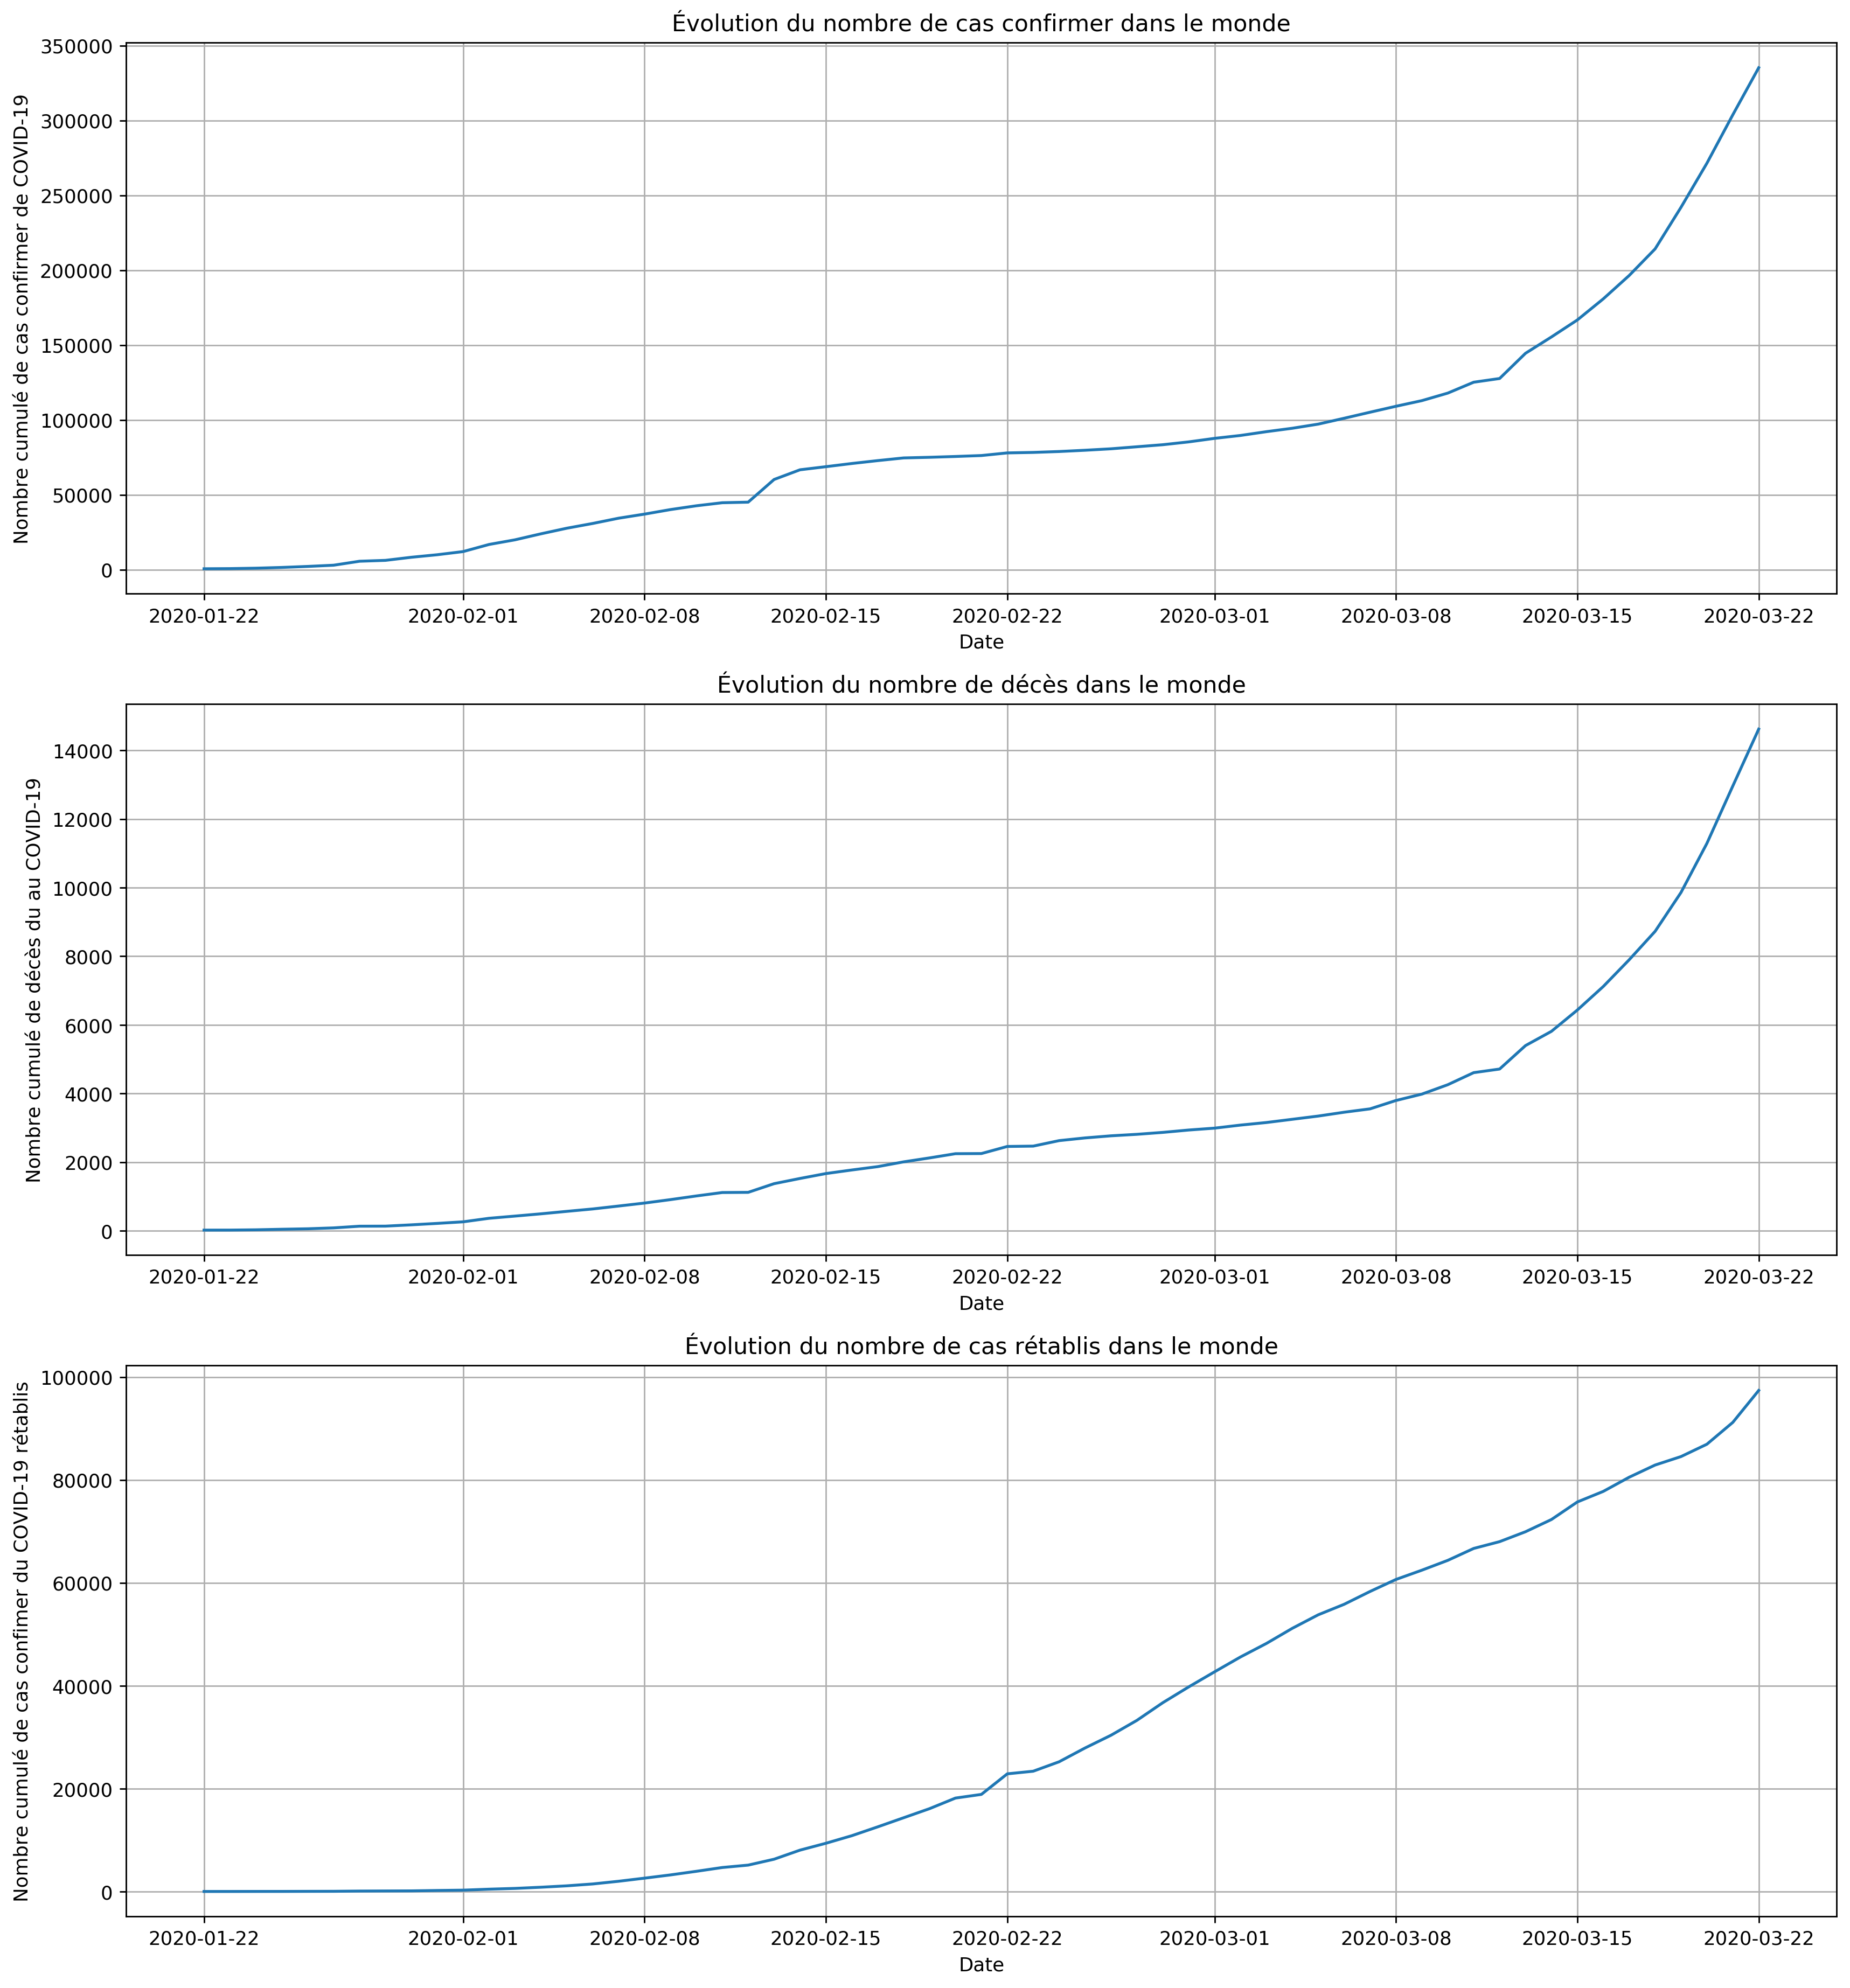

In [54]:
confirmed_Cases_plot = plt.figure(num=1, dpi=256, figsize=(16, 18))

plt.subplot(311)
plt.plot(grouped_covid19_data_by_Date.Confirmed)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer de COVID-19')
plt.title('Évolution du nombre de cas confirmer dans le monde')

plt.subplot(312)
plt.plot(grouped_covid19_data_by_Date.Deaths)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de décès du au COVID-19')
plt.title('Évolution du nombre de décès dans le monde')

plt.subplot(313)
plt.plot(grouped_covid19_data_by_Date.Recovered)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confimer du COVID-19 rétablis')
plt.title('Évolution du nombre de cas rétablis dans le monde')

plt.show()

* Nous remarquons tout d'abord sur l'évolution du nombre de cas est en accroissement a priori exponentiel et est d'environs **340000** cas.
* Le nombre de décès évolue aussi selon une tendance exponentielle et est d'environs **15000** décès.
* Le nombre de cas rétablis est linéaire et se situe entre **90000** et **100000**.

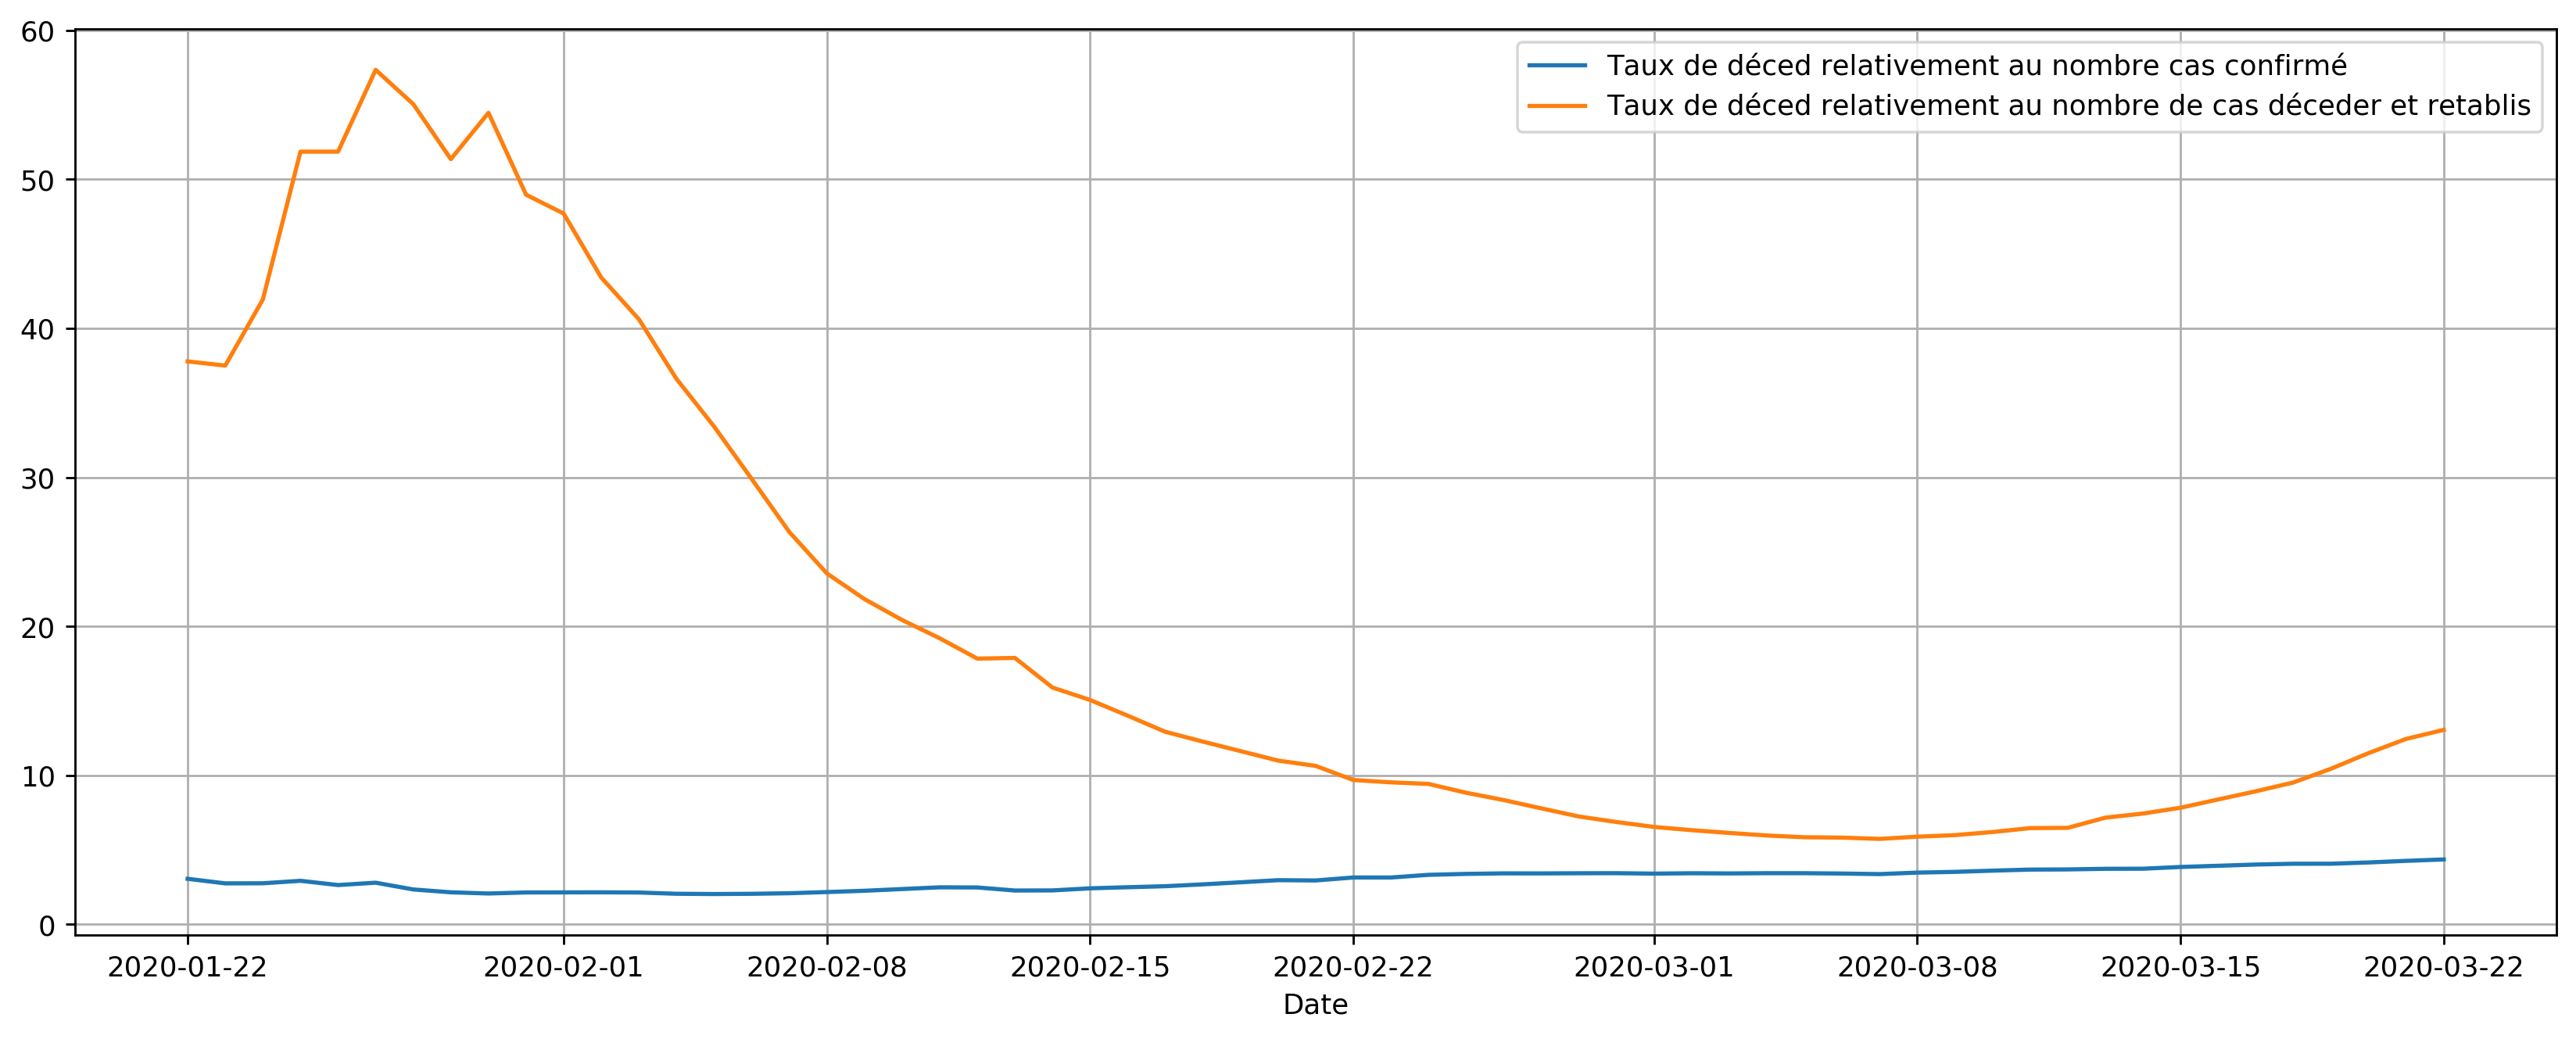

In [63]:
grouped_covid19_kpi_by_Date = Covid19[columns[4:8]].groupby(by='Date').sum()
grouped_covid19_kpi_by_Date['ADR'] = 100*grouped_covid19_kpi_by_Date.Deaths/grouped_covid19_kpi_by_Date.Confirmed #Absolute Death rate
grouped_covid19_kpi_by_Date['DRR'] = 100*grouped_covid19_kpi_by_Date.Deaths/(grouped_covid19_kpi_by_Date.Deaths + grouped_covid19_kpi_by_Date.Recovered) #Death/Recovred Rate.
grouped_covid19_kpi_by_Date.fillna(0, inplace=True)

confirmed_Cases_plot = plt.figure(num=2, dpi=256, figsize=(16, 6))

plt.plot(grouped_covid19_kpi_by_Date.ADR,
         label = 'Taux de déced relativement au nombre cas confirmé')
plt.plot(grouped_covid19_kpi_by_Date.DRR,
         label = 'Taux de déced relativement au nombre de cas déceder et retablis')
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.legend()

plt.show()

* Le taux moyen de décès mondial varie faiblement entre 3% et 4%.
* Le taux moyen de décès mondial par rapport aux taux de personne rétablis a varié significativement et est entrain de se stabiliser entre 10% et 15% en remarque aussi qu'il est strictement supérieur ADR.

### Visualisation par continent:

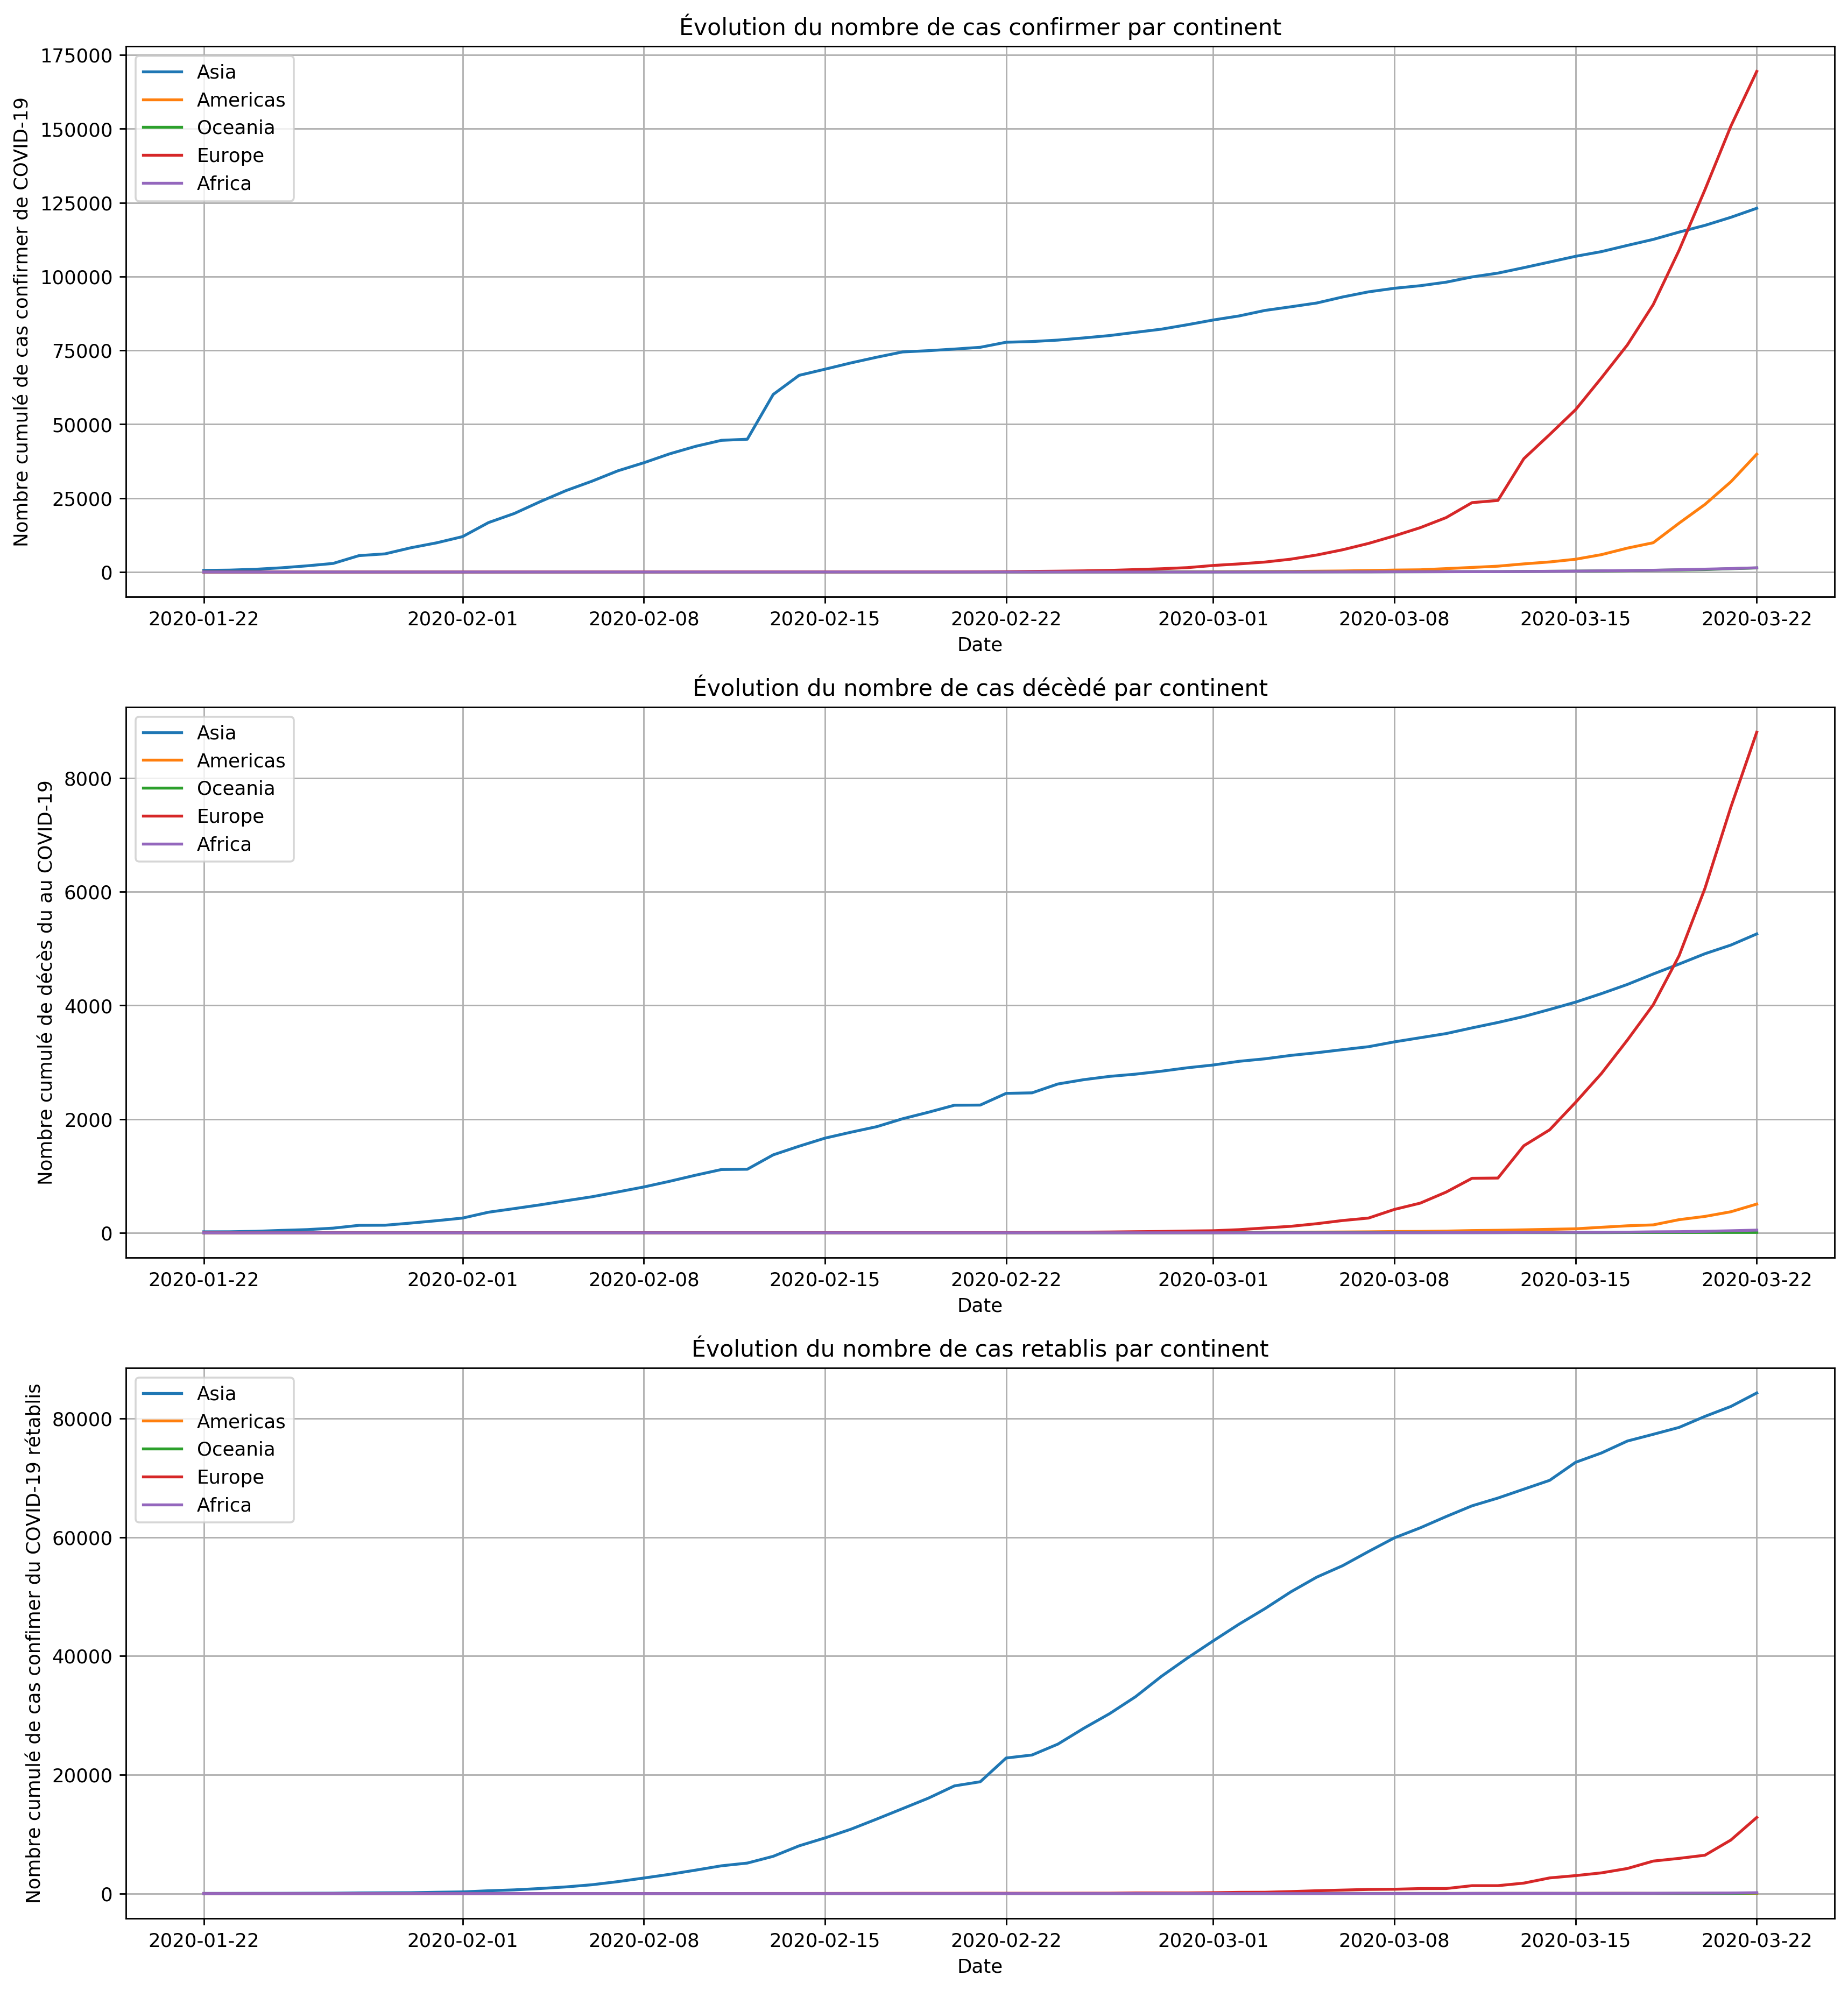

In [61]:
plt.figure(num=1, dpi=256, figsize=(16, 18))

plt.subplot(311)
for continent in Covid19.region.unique():
    data = Covid19.loc[Covid19.region == continent, ['Date', 'Confirmed']].groupby(by='Date').sum()
    plt.plot(data.Confirmed, label=continent)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer de COVID-19')
plt.title('Évolution du nombre de cas confirmer par continent')
plt.legend()

plt.subplot(312)
for continent in Covid19.region.unique():
    data = Covid19.loc[Covid19.region == continent, ['Date', 'Deaths']].groupby(by='Date').sum()
    plt.plot(data.Deaths, label=continent)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de décès du au COVID-19')
plt.title('Évolution du nombre de cas décèdé par continent')
plt.legend()

plt.subplot(313)
for continent in Covid19.region.unique():
    data = Covid19.loc[Covid19.region == continent, ['Date', 'Recovered']].groupby(by='Date').sum()
    plt.plot(data.Recovered, label=continent)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confimer du COVID-19 rétablis')
plt.title('Évolution du nombre de cas retablis par continent')
plt.legend()
    
plt.show()

* Dans le premier graphique nous remarquons qu'en Asie la situation est maîtrisé, la variation du nombre de cas évolue avec une tendance linéaire. En Europe, la situation s'aggrave en terme de nombre de cas à dépasser celui de l'Asie. En Amérique, l'accroissement est exponentiel. Les autres continents ne sont pas encore rentrés dans la phase exponentielle ou pas décelable due au nombre de cas encore assez bas.

* Le nombre de décès en Asie varie linéairement, contrairement a l'a situation en Europe qui compte presque deux fois plus de décès qu'en Asie. En Amérique, on enregistre une faible mortalité relativement au cas asiatique ou européen.

* Le nombre d'individus rétablis en Asie se situe au alentour de 80000 individus. En Europe, 15000 individus environ. Ce qui est très peu par rapport au nombre de cas enregistré.

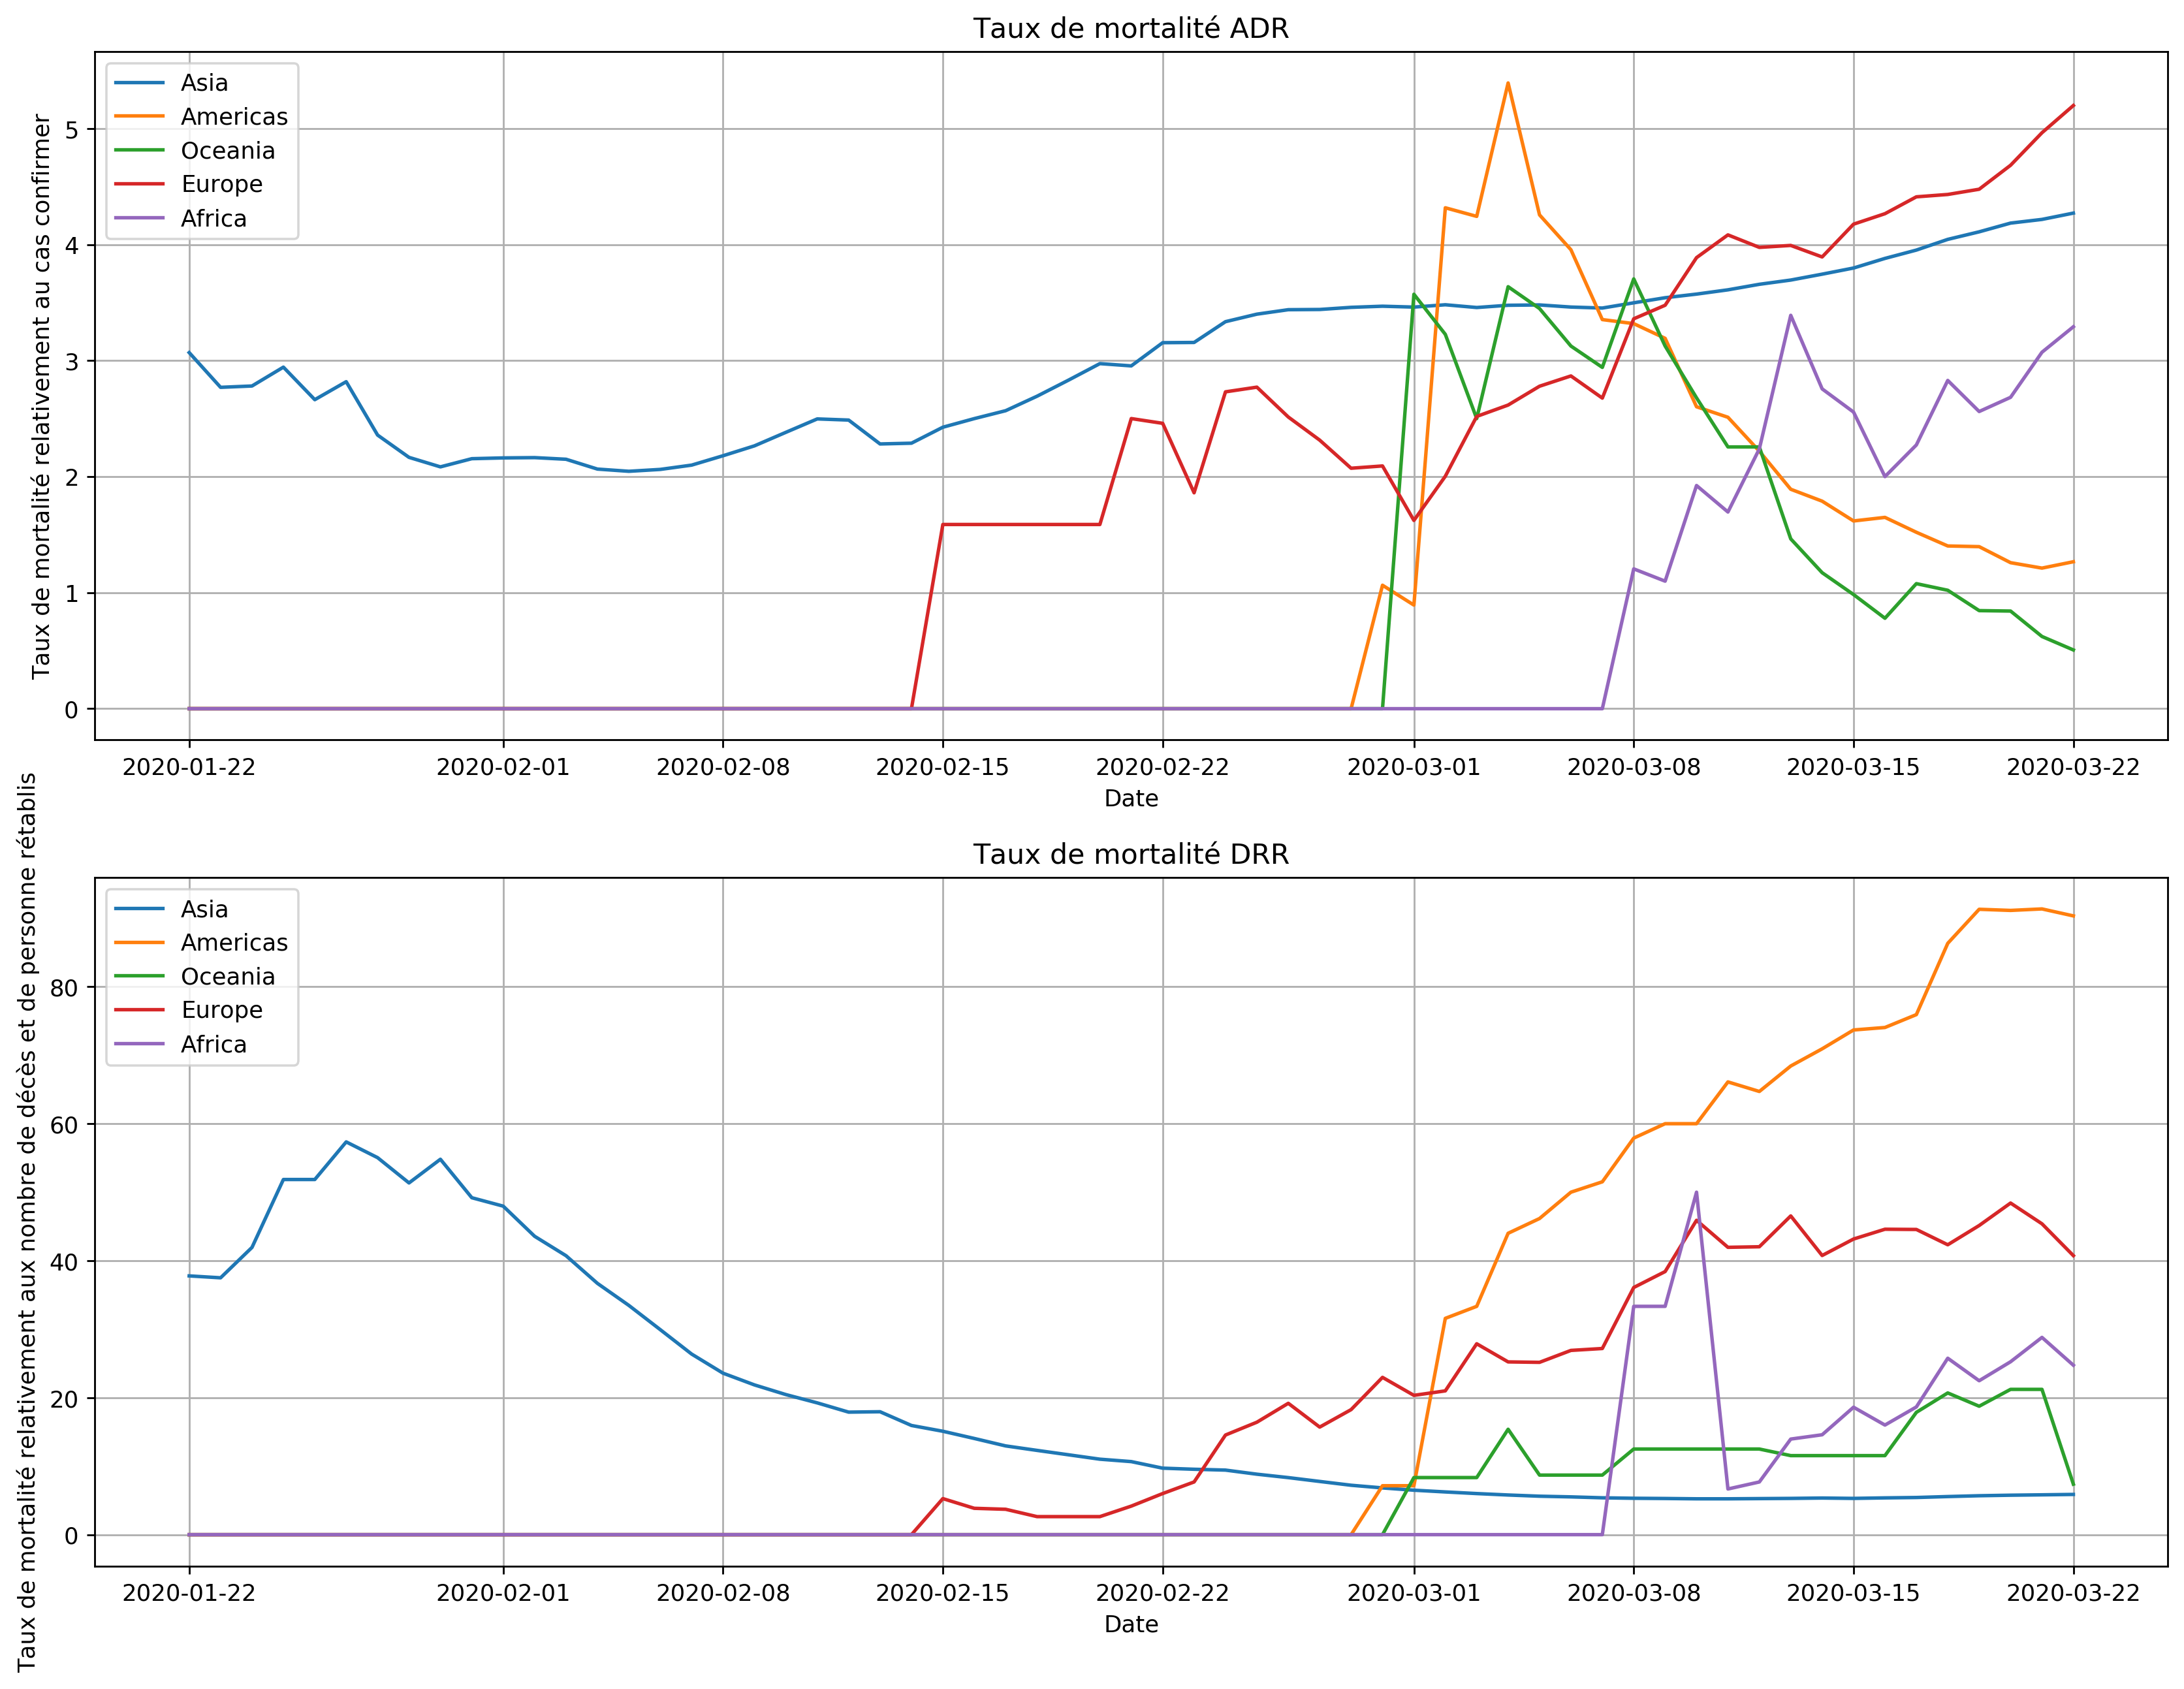

In [76]:
plt.figure(num=1, dpi=256, figsize=(16, 12))

plt.subplot(211)
for continent in Covid19.region.unique():
    data = Covid19.loc[Covid19.region == continent, ['Date', 'Confirmed', 'Deaths', 'Recovered']].groupby(by='Date').sum()
    data['ADR'] = 100*data.Deaths/data.Confirmed #Absolute Death rate
    data['DRR'] = 100*data.Deaths/(data.Deaths + data.Recovered) #Death/Recovred Rate.
    data.fillna(0, inplace=True)
    plt.plot(data.ADR, label=continent)

plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Taux de mortalité relativement au cas confirmer')
plt.title('Taux de mortalité ADR')
plt.legend()

plt.subplot(212)
for continent in Covid19.region.unique():
    data = Covid19.loc[Covid19.region == continent, ['Date', 'Confirmed', 'Deaths', 'Recovered']].groupby(by='Date').sum()
    data['ADR'] = 100*data.Deaths/data.Confirmed #Absolute Death rate
    data['DRR'] = 100*data.Deaths/(data.Deaths + data.Recovered) #Death/Recovred Rate.
    data.fillna(0, inplace=True)
    plt.plot(data.DRR, label=continent)

plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Taux de mortalité relativement aux nombre de décès et de personne rétablis')
plt.title('Taux de mortalité DRR')
plt.legend()

plt.show()

* Taux de mortalité ADR: $$\frac{\text{nombres de décès}}{\text{nombres de cas confirmés}}$$
Le taux le plus élevé est enregistré en Europe, en Asie le taux est ectuellement supperieur a 4%. La tendance est croissante en Afrique, en Asie et en Europe. en Amérique, et en Oceanie elle est décroissante. Avec le taux le plus faible en Amérique avec moins de 1%.
* Taux de mortalité DRR: $$\frac{\text{nombres de décès}}{\text{nombres de décès} + \text{nombres de personnes rétablies}}$$
en Amérique, en Europe, on distingue que le DRR a une tendance strictement croissante avec un Taux maximal en Amérique avec plus de 90%. En Asie, le DRR décroît fortement et stagne depuis près de deux semaines a moins de 10%. Pour e qui est de l'Océanie et de l'Afrique il n'y a pas de tendance décelable, mais il y a une assez forte variabilité.

### Afrique:

In [26]:
Covid19_Afrique = Covid19.loc[Covid19.region == "Africa"]

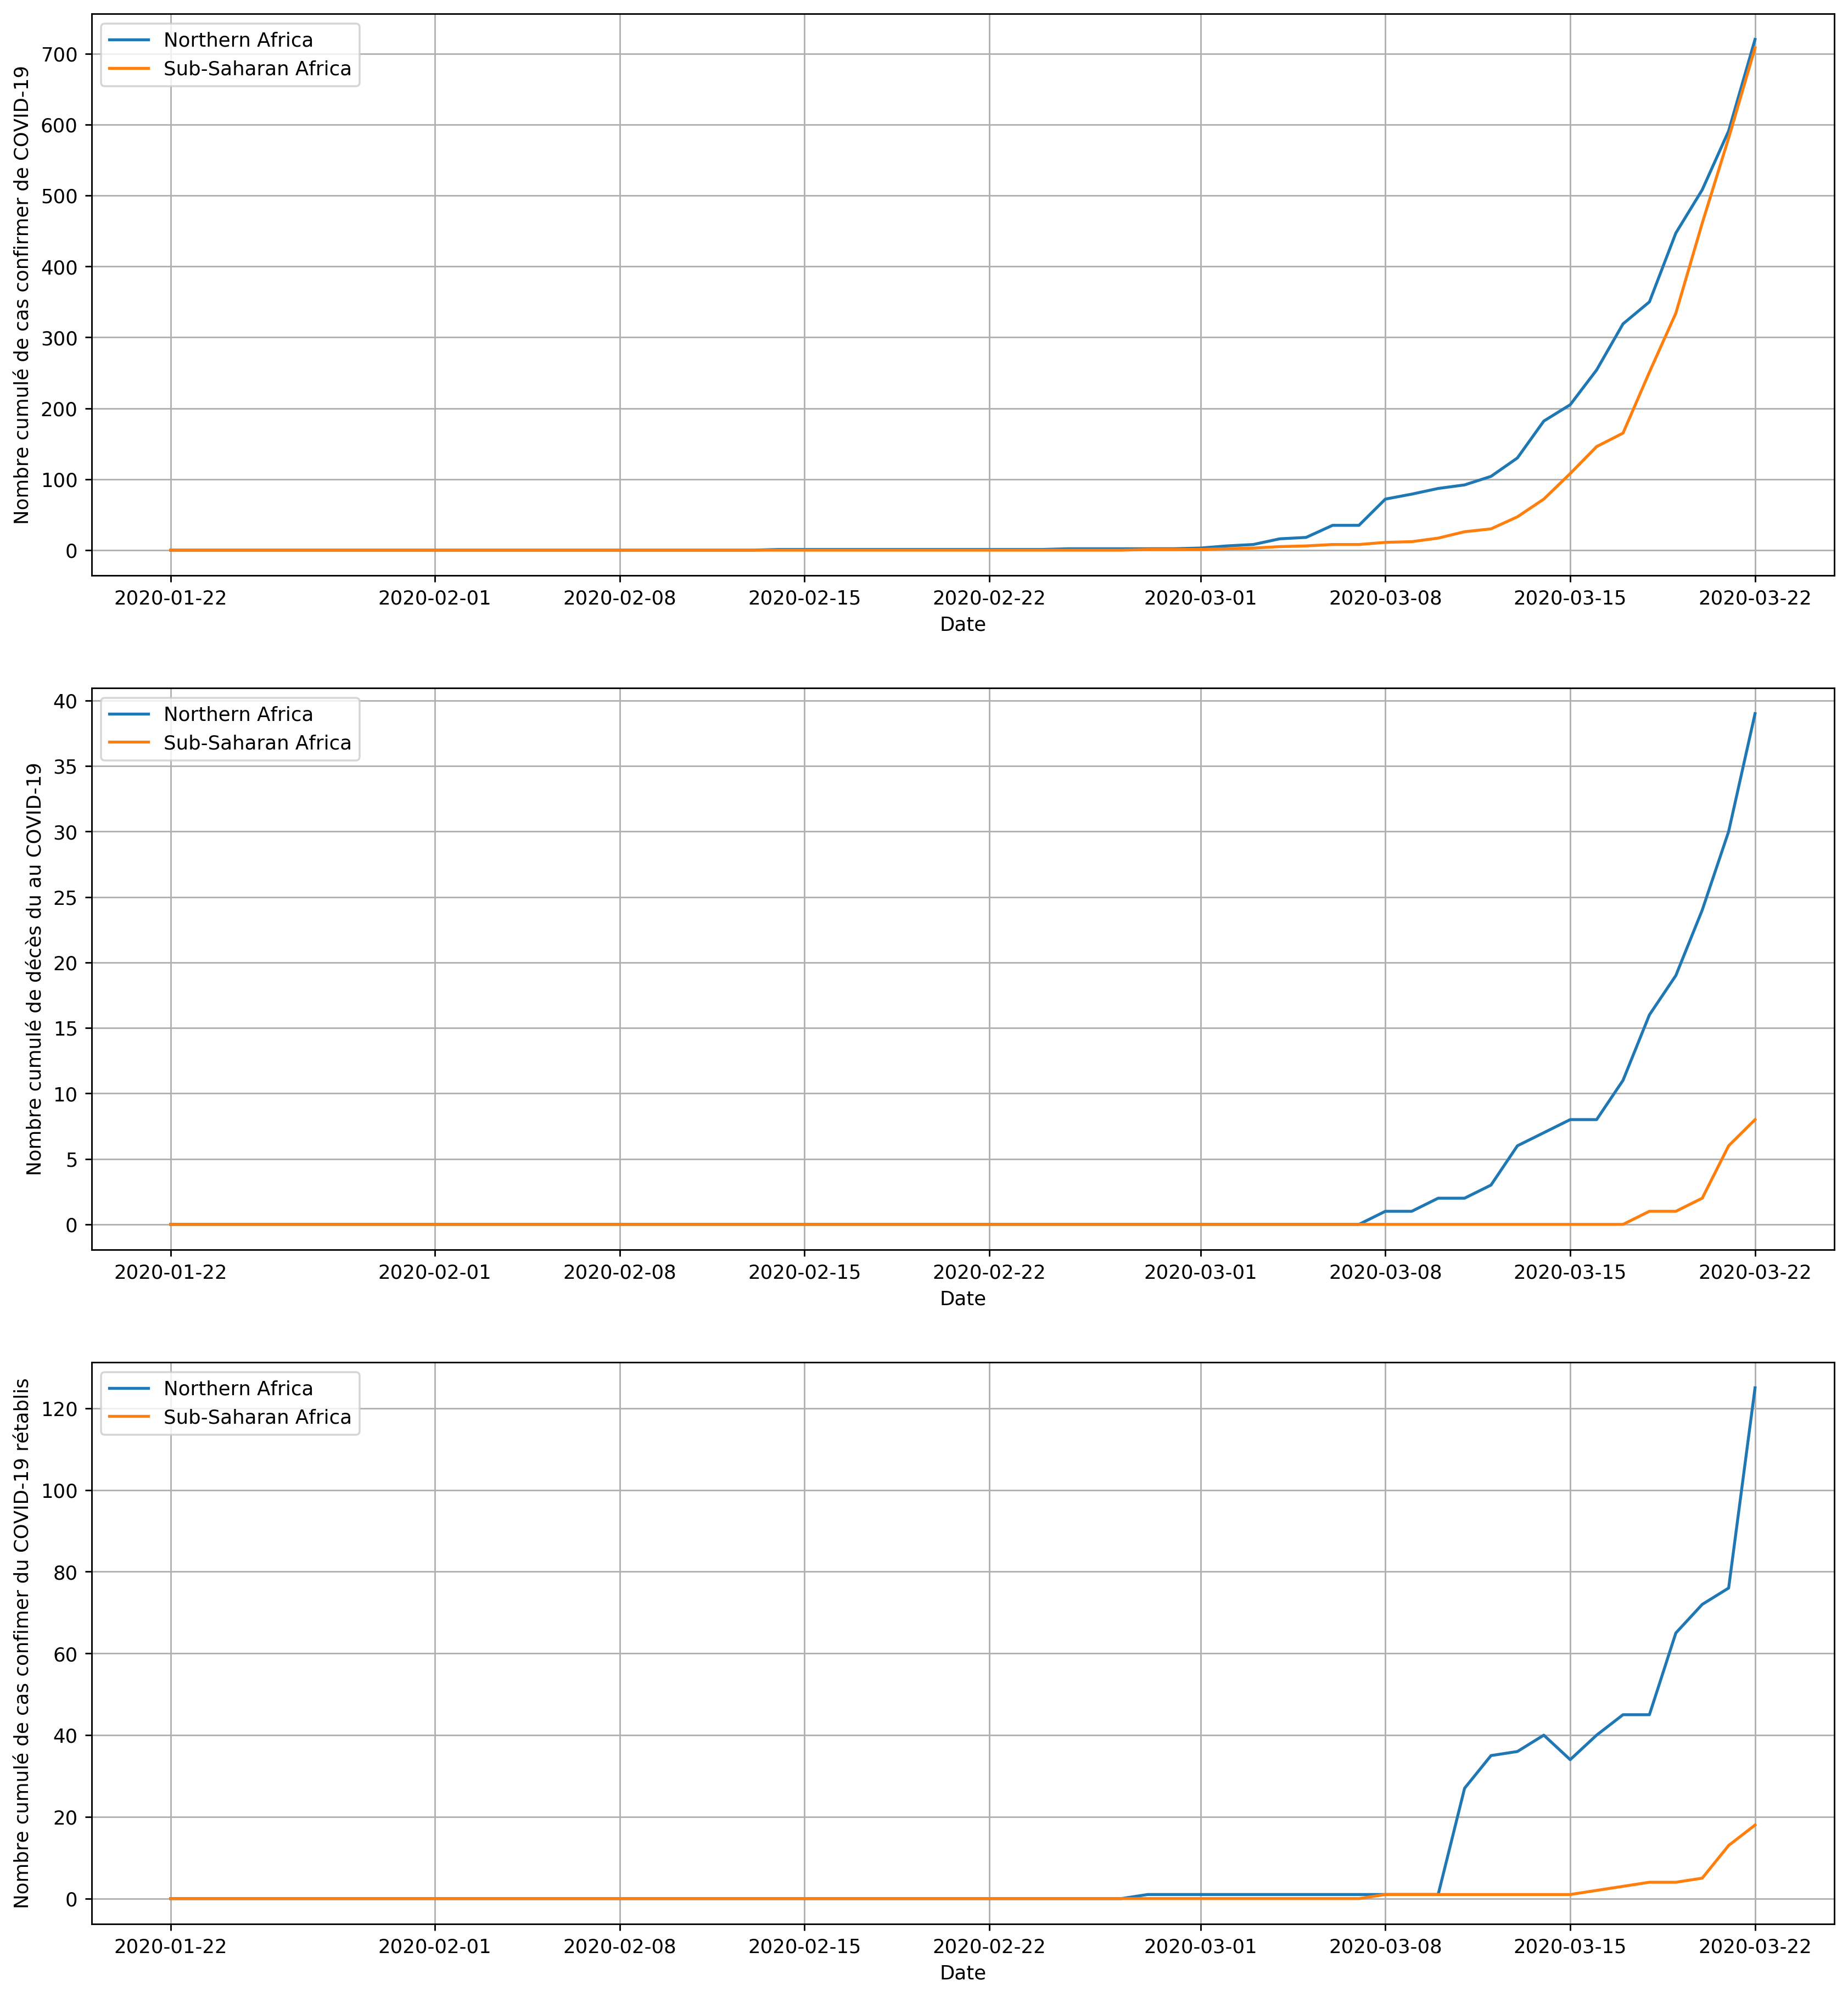

In [27]:
plt.figure(num=1, dpi=256, figsize=(16, 18))

plt.subplot(311)
for sub in Covid19_Afrique['sub-region'].unique():
    data = Covid19_Afrique.loc[Covid19_Afrique['sub-region'] == sub, ['Date', 'Confirmed']].groupby(by='Date').sum()
    plt.plot(data.Confirmed, label=sub)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer de COVID-19')
plt.legend()

plt.subplot(312)
for sub in Covid19_Afrique['sub-region'].unique():
    data = Covid19_Afrique.loc[Covid19_Afrique['sub-region'] == sub, ['Date', 'Deaths']].groupby(by='Date').sum()
    plt.plot(data.Deaths, label=sub)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de décès du au COVID-19')
plt.legend()

plt.subplot(313)
for sub in Covid19_Afrique['sub-region'].unique():
    data = Covid19_Afrique.loc[Covid19_Afrique['sub-region'] == sub, ['Date', 'Recovered']].groupby(by='Date').sum()
    plt.plot(data.Recovered, label=sub)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confimer du COVID-19 rétablis')
plt.legend()
    
plt.show()

* Nombre de cas en afrique du nord, en Afrique sub saharienne on distingue un nombre de cas qui s'accroît de façon exponentielle avec une courbure plus prononcé en Afrique sub saharienne.
* Le nombre de décès est croissant dans les deux régions, Avec un nombre de décès en afrique du nord de 40 décès environ contre moins de 10 cas en Afrique sub saharienne.
* Le nombre de malades guérie a une tendance croissante qui est plus prononcer en afrique du nord Ave plus de 120 individus. Contre 19 en Afrique sub saharienne.

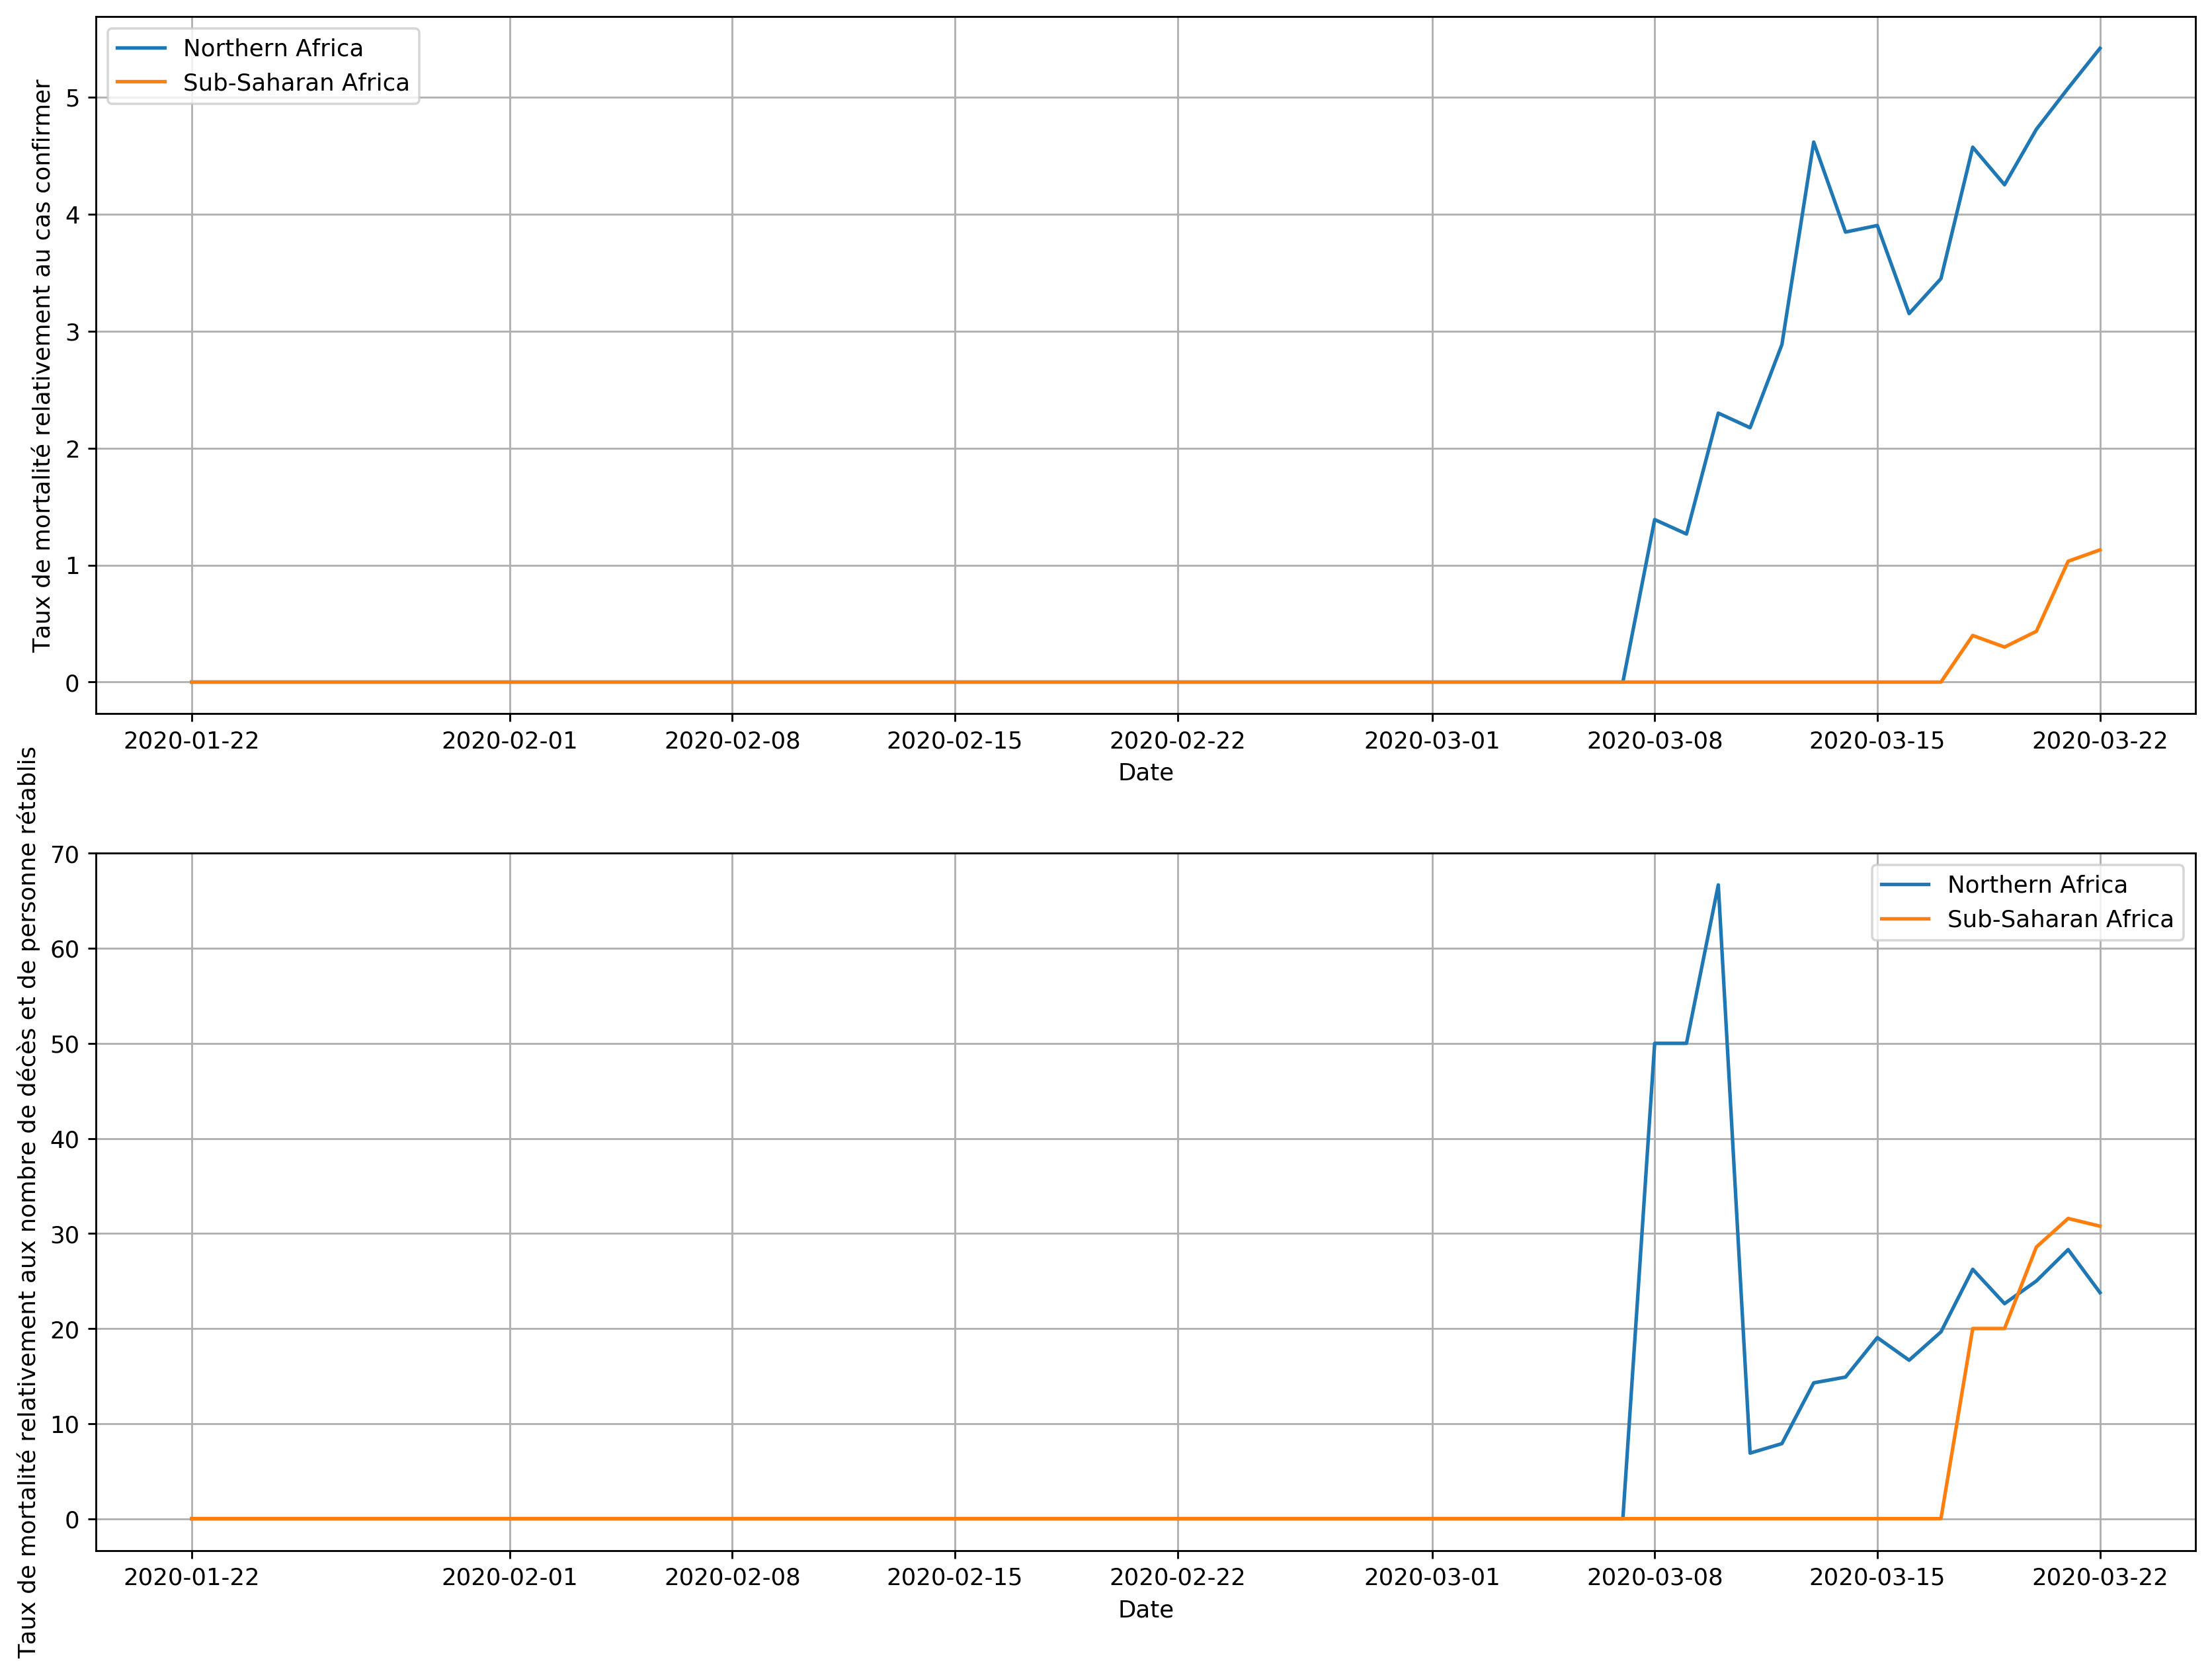

In [75]:
plt.figure(num=1, dpi=256, figsize=(16, 12))

plt.subplot(211)
for sub in Covid19_Afrique['sub-region'].unique():
    data = Covid19.loc[Covid19['sub-region'] == sub, ['Date', 'Confirmed', 'Deaths', 'Recovered']].groupby(by='Date').sum()
    data['ADR'] = 100*data.Deaths/data.Confirmed #Absolute Death rate
    data.fillna(0, inplace=True)
    plt.plot(data.ADR, label=sub)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Taux de mortalité relativement au cas confirmer')
plt.legend()

plt.subplot(212)
for sub in Covid19_Afrique['sub-region'].unique():
    data = Covid19.loc[Covid19['sub-region'] == sub, ['Date', 'Confirmed', 'Deaths', 'Recovered']].groupby(by='Date').sum()
    data['DRR'] = 100*data.Deaths/(data.Deaths + data.Recovered) #Death/Recovred Rate.
    data.fillna(0, inplace=True)
    plt.plot(data.DRR, label=sub)

plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Taux de mortalité relativement aux nombre de décès et de personne rétablis')
plt.legend()

plt.show()

* Taux de mortalité ADR: $$\frac{\text{nombres de décès}}{\text{nombres de cas confirmés}}$$
En afrique du nord l' ADR est croissant avec une tendance linéaire et se situe a plus de 5% Actuellement, contre un peu plus de 1% en Afrique sub saharienne.

* Taux de mortalité DRR: $$\frac{\text{nombres de décès}}{\text{nombres de décès} + \text{nombres de personnes rétablies}}$$
On remarque du fait que DDR en afrique du nord est de prés de 25%, il y a 3 fois plus de personne rétabli que de décès. En Afrique sub saharienne ce taux se situe a plus de 30%.

### Aftique du nord:

In [29]:
Covid19_NorthAf = Covid19.loc[Covid19['sub-region'] == 'Northern Africa']

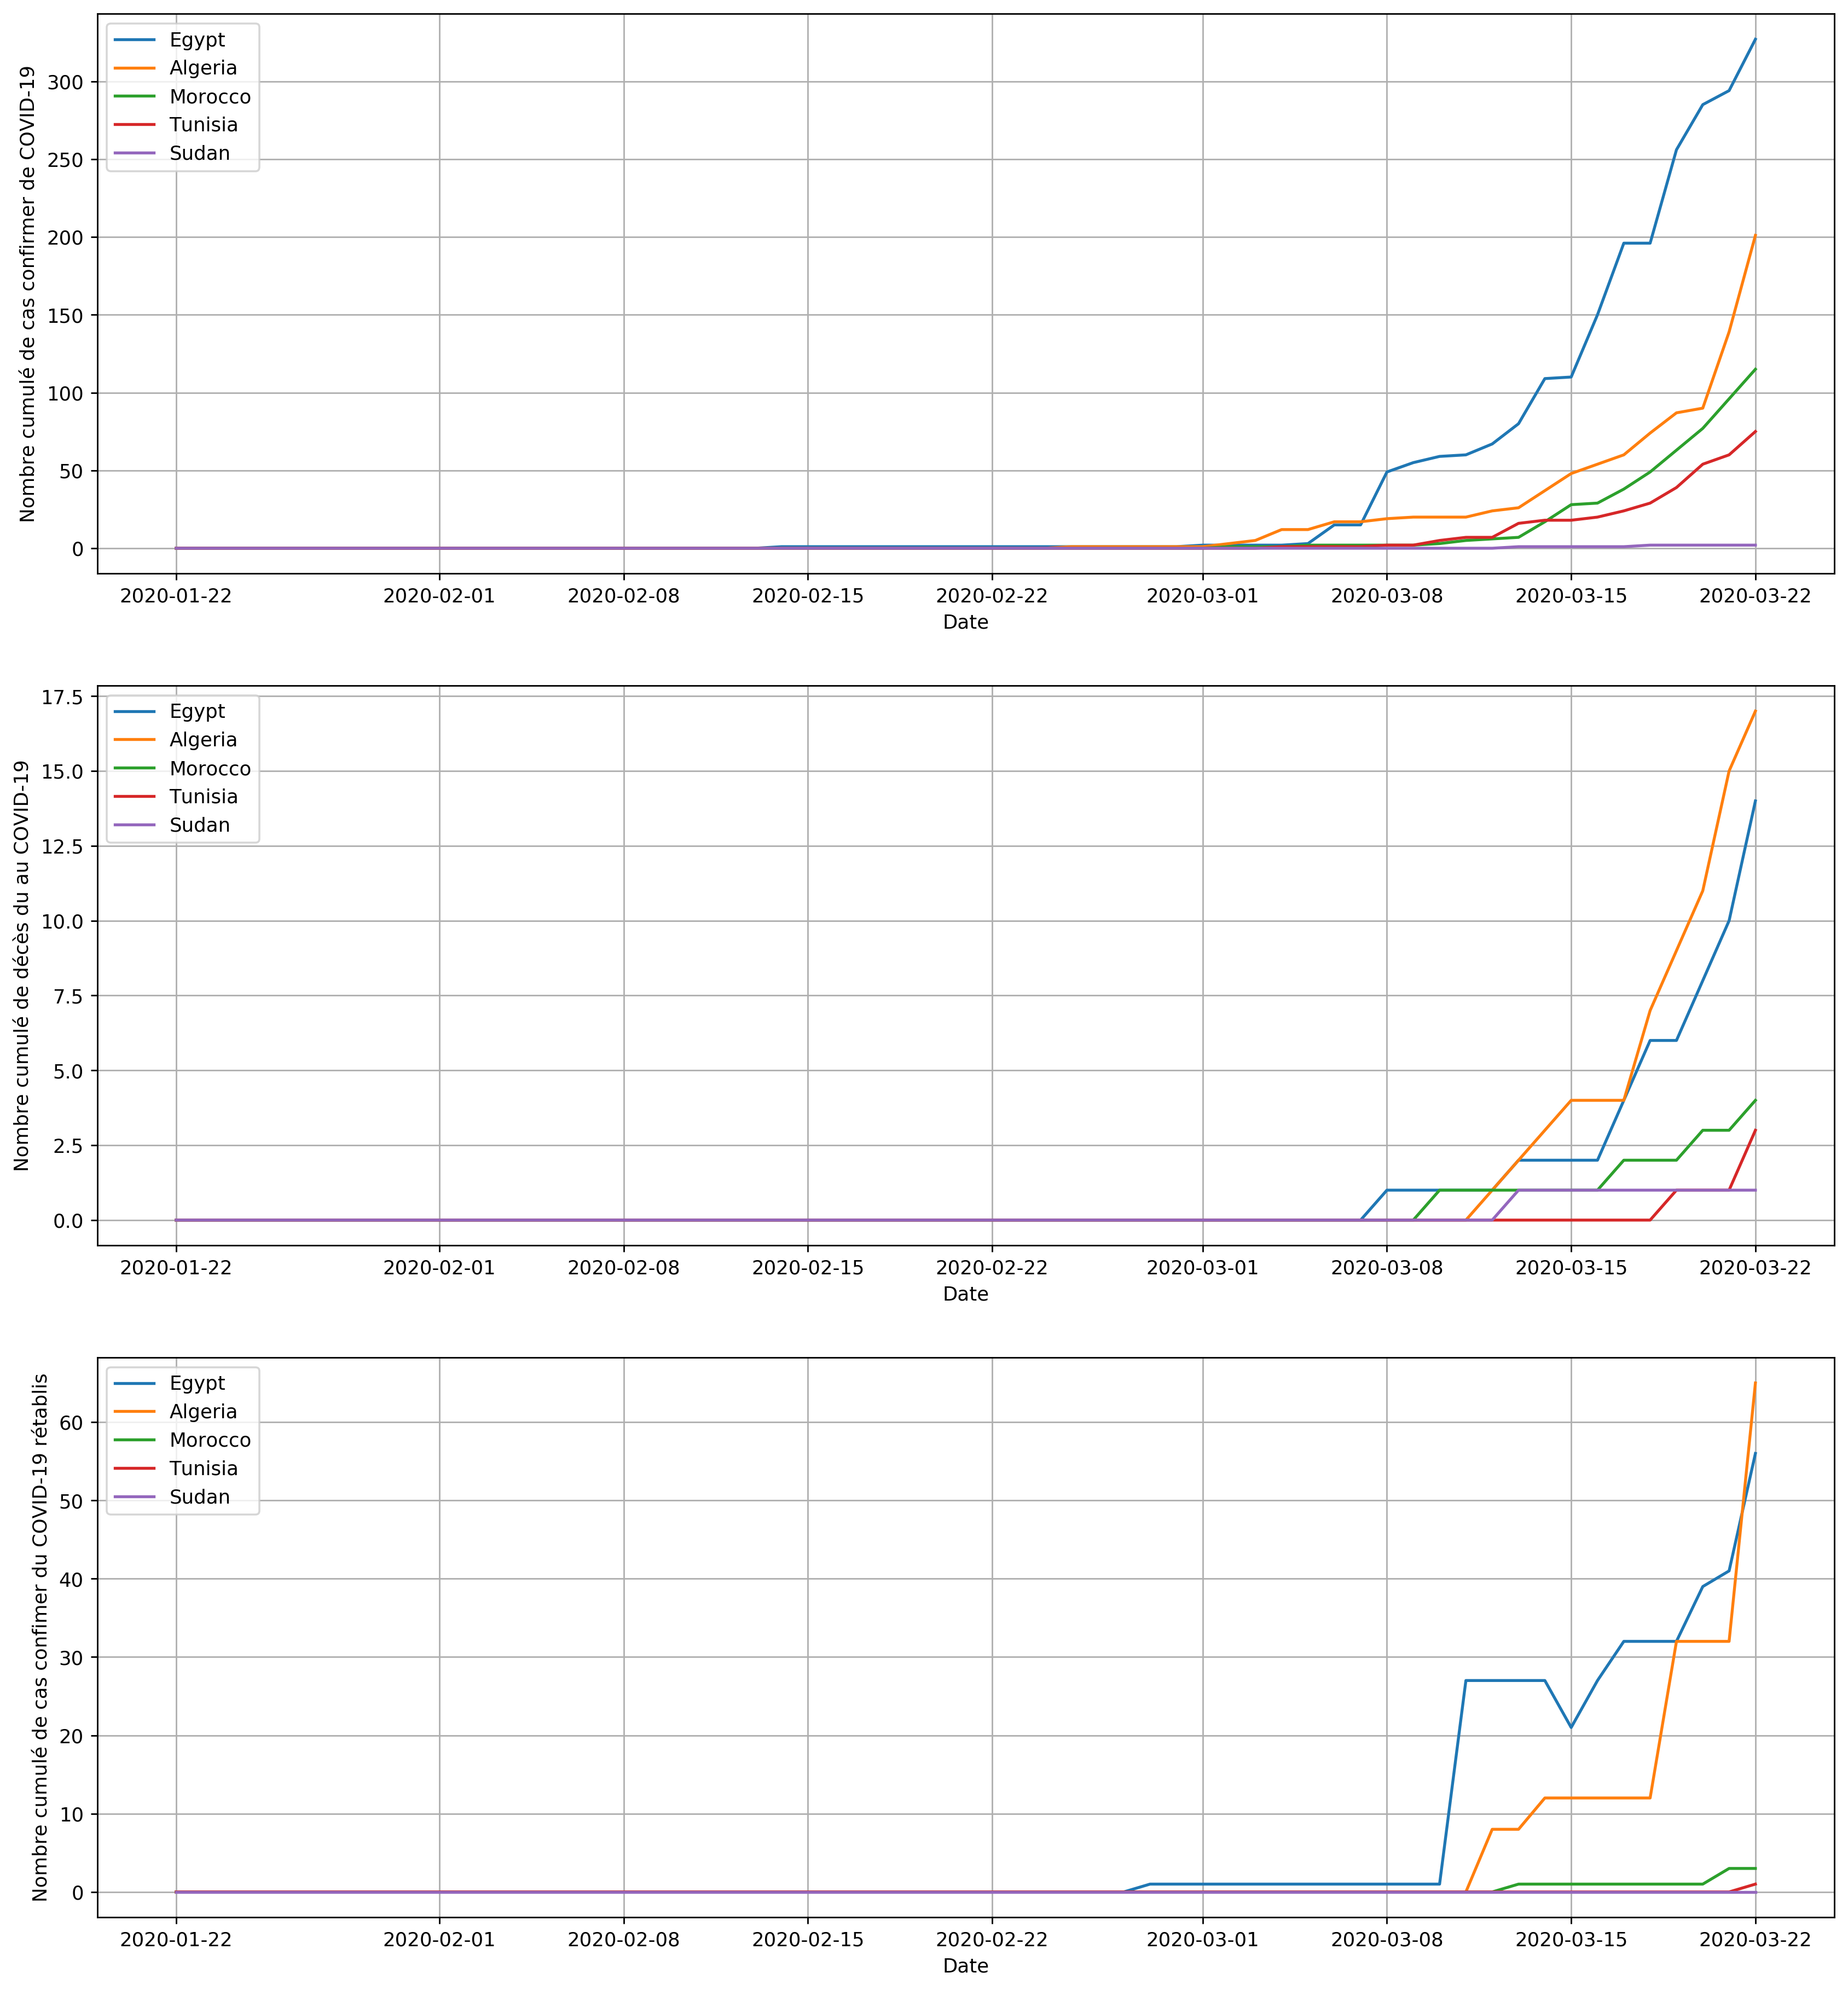

In [30]:
plt.figure(num=1, dpi=256, figsize=(16, 18))

plt.subplot(311)
for country in Covid19_NorthAf['Country/Region'].unique():
    data = Covid19_NorthAf.loc[Covid19_NorthAf['Country/Region'] == country, ['Date', 'Confirmed']].groupby(by='Date').sum()
    plt.plot(data.Confirmed, label=country)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer de COVID-19')
plt.legend()

plt.subplot(312)
for country in Covid19_NorthAf['Country/Region'].unique():
    data = Covid19_NorthAf.loc[Covid19_NorthAf['Country/Region'] == country, ['Date', 'Deaths']].groupby(by='Date').sum()
    plt.plot(data.Deaths, label=country)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de décès du au COVID-19')
plt.legend()

plt.subplot(313)
for country in Covid19_NorthAf['Country/Region'].unique():
    data = Covid19_NorthAf.loc[Covid19_NorthAf['Country/Region'] == country, ['Date', 'Recovered']].groupby(by='Date').sum()
    plt.plot(data.Recovered, label=country)
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confimer du COVID-19 rétablis')
plt.legend()
    
plt.show()

En afrique du Nord l'Egypte est le pays le plus touché avec plus de 300 cas dont 14 décès et 55 rétablis. L'Algérie qui est le second pays le plus touché avec 201 cas dont 17 décès et 65 individus guérie. Les autres pays du Maghreb ne semblent pas maîtriser la situation la Tunisie avec environ 70 cas et le Maroc avec environ 110 cas.

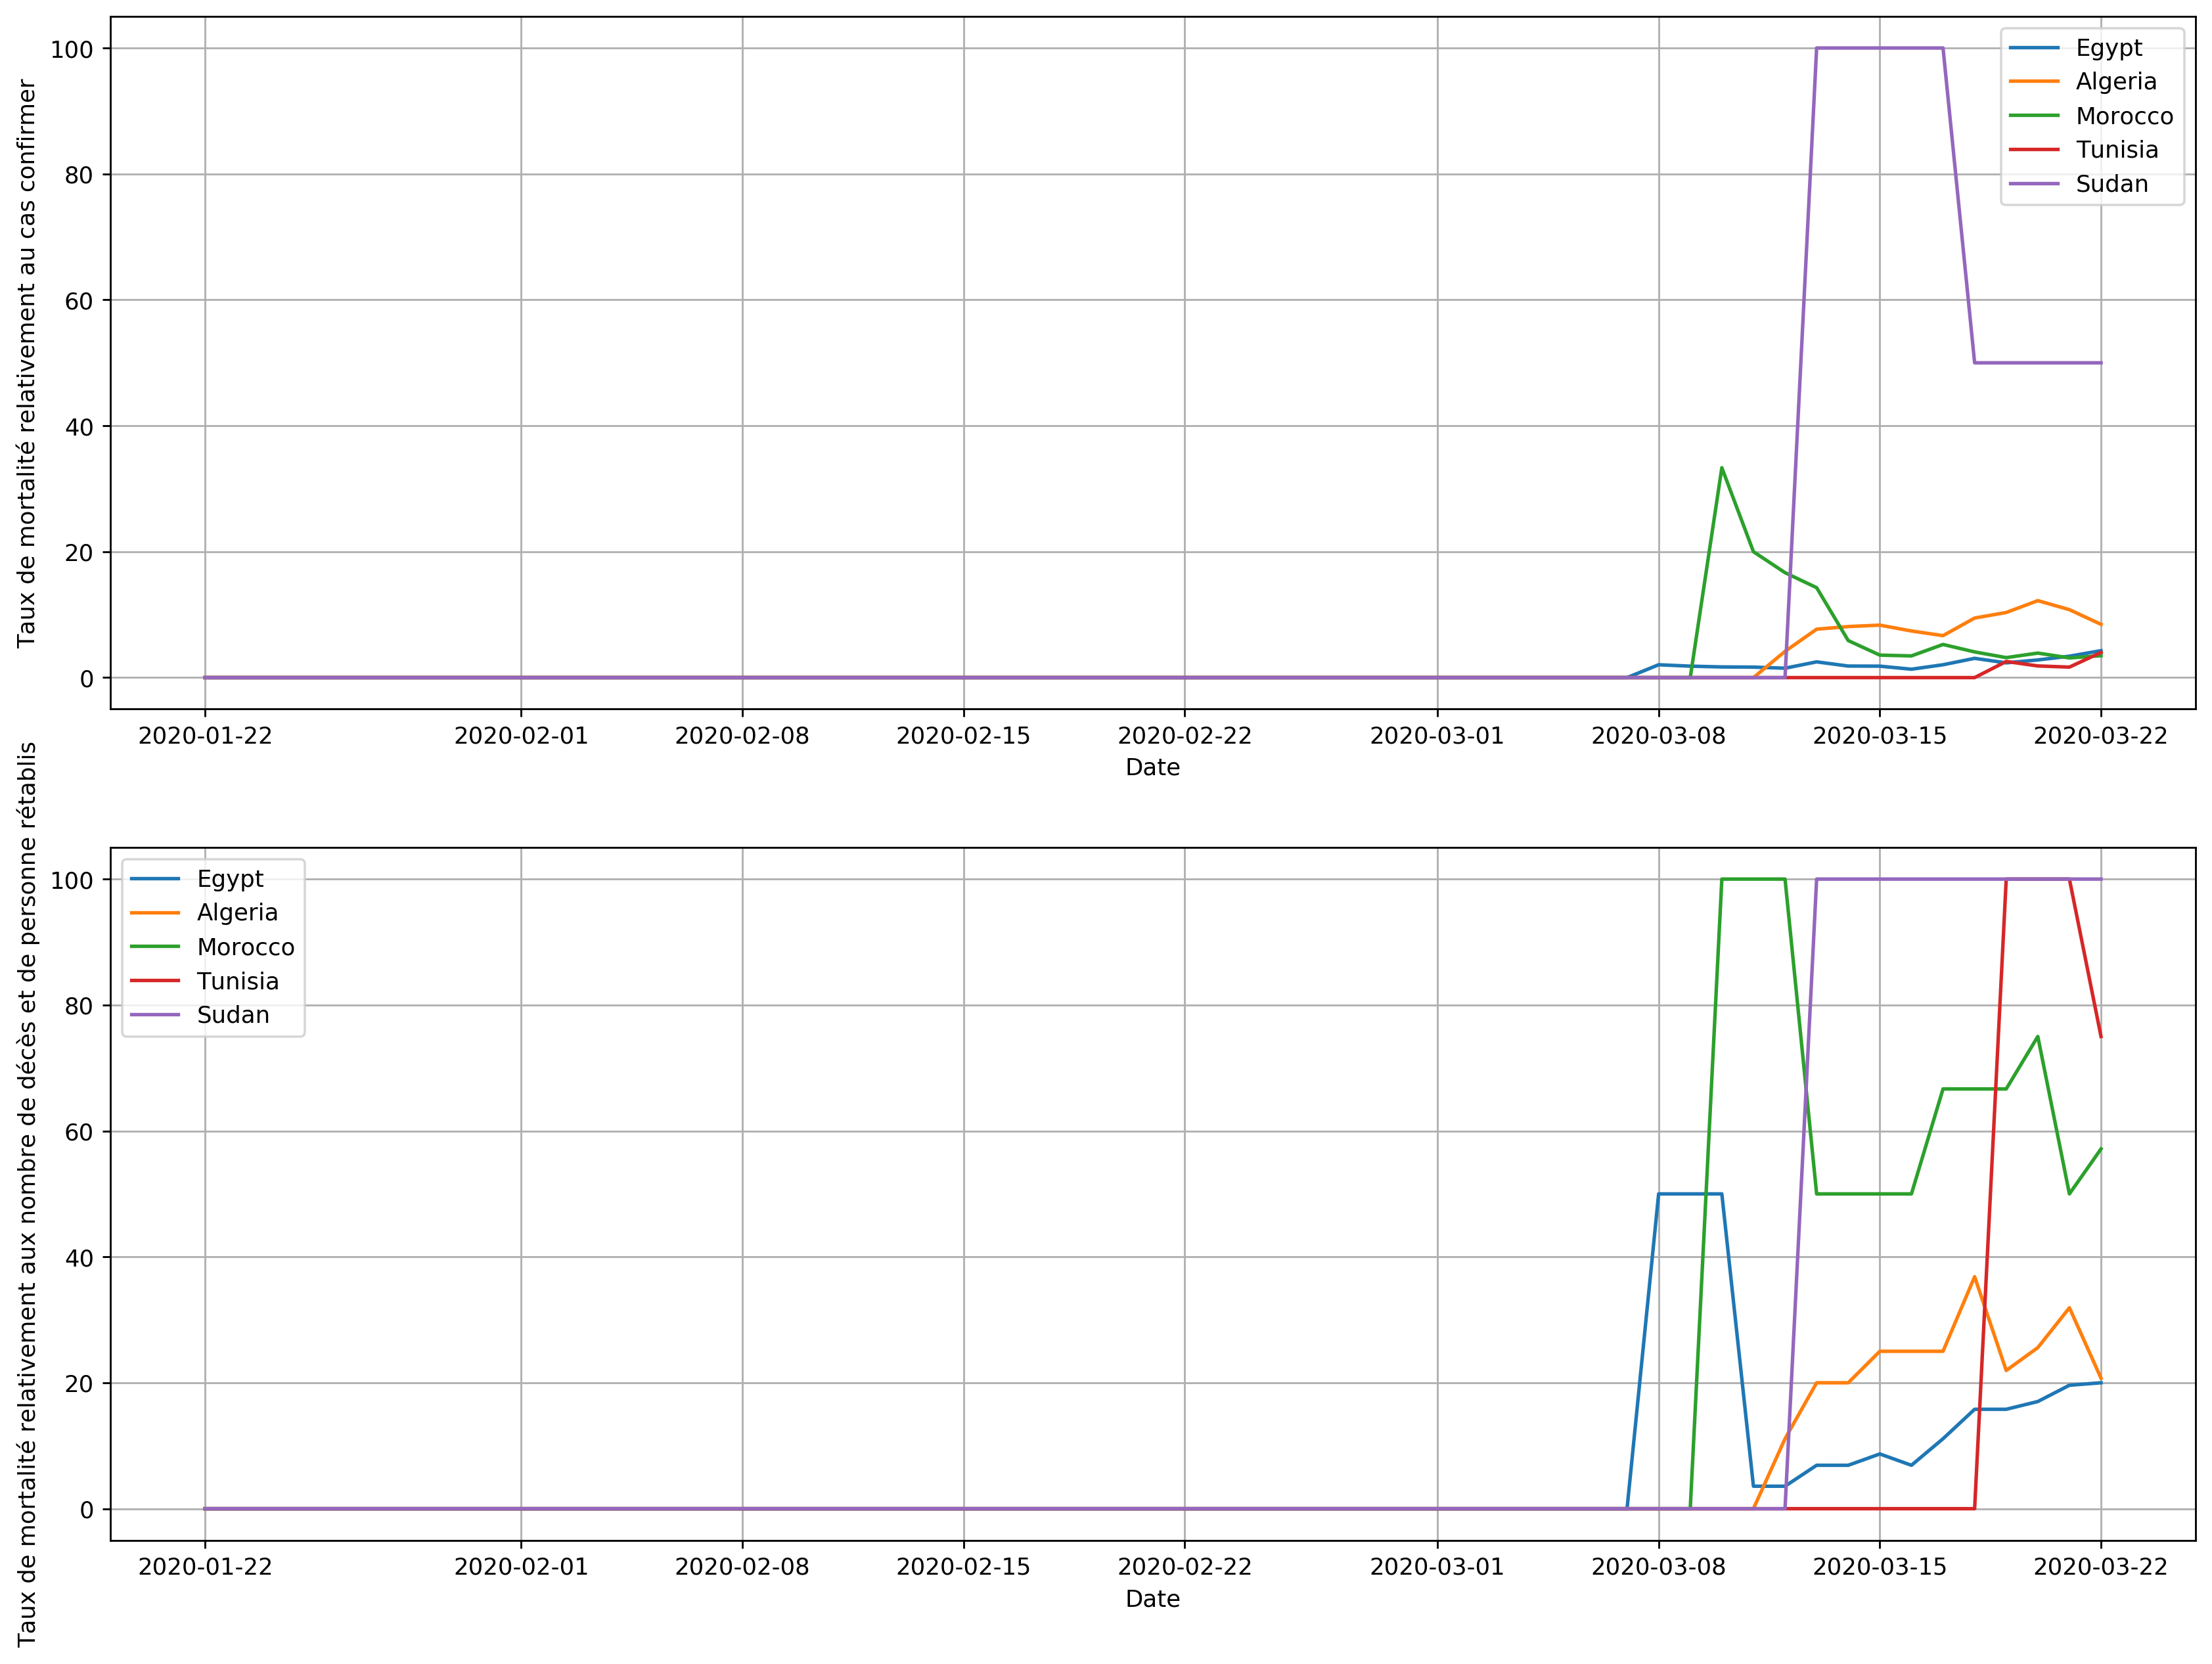

In [31]:
plt.figure(num=1, dpi=256, figsize=(16, 12))

plt.subplot(211)
for country in Covid19_NorthAf['Country/Region'].unique():
    data = Covid19_NorthAf.loc[Covid19_NorthAf['Country/Region'] == country, ['Date', 'ADR']].groupby(by='Date').mean()
    plt.plot(data.ADR, label=country)

plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Taux de mortalité relativement au cas confirmer')
plt.legend()

plt.subplot(212)
for country in Covid19_NorthAf['Country/Region'].unique():
    data = Covid19_NorthAf.loc[Covid19_NorthAf['Country/Region'] == country, ['Date', 'DRR']].groupby(by='Date').mean()
    plt.plot(data.DRR, label=country)

plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Taux de mortalité relativement aux nombre de décès et de personne rétablis')
plt.legend()

plt.show()

* Taux de mortalité ADR: $$\frac{\text{nombres de décès}}{\text{nombres de cas confirmés}}$$
L'ADR de presque tout les pays d'afrique du nords sauf le Sudan est inferieur a 10% le plus eleve etant de l'algérie Avec prés 10%, le soudant n'ayant pas bcp de cas ce tausx n'est pas representatif.
* Taux de mortalité DRR:$$\frac{\text{nombres de décès}}{\text{nombres de décès} + \text{nombres de personnes rétablies}}$$
En Egypte et en Algérie le DRR est d'approximativement 20%, c 'est qu au fait qu'il ya peu de décès relativement au personne rétablis, contrairement en Tunisie, eau Maroc et au Sudan.

### La Chine

Text(0, 0.5, 'Nombre cumulé de cas confirmer actuel de COVID-19')

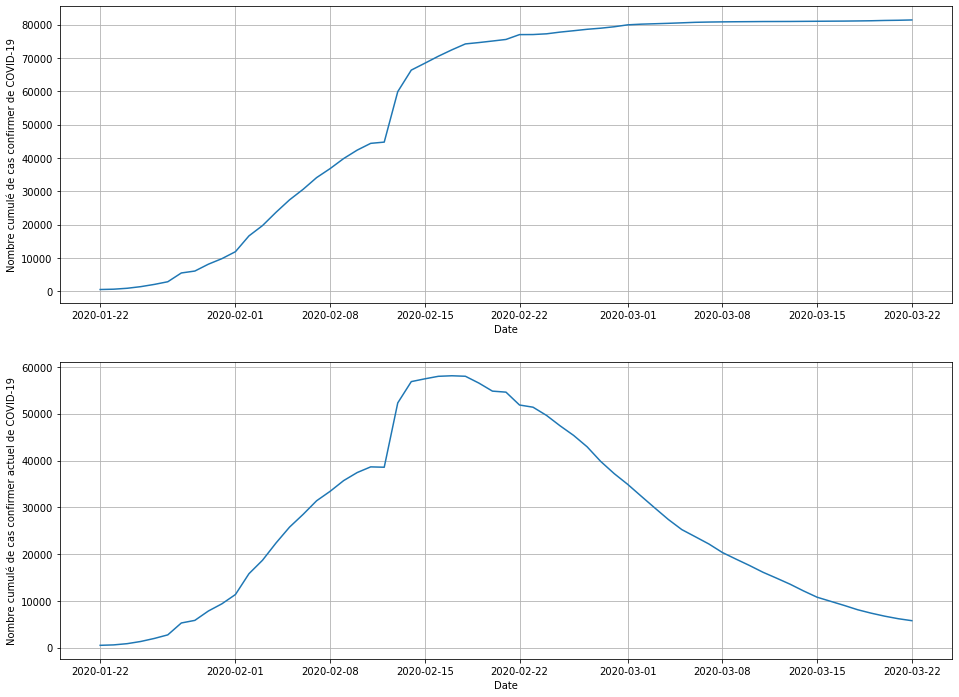

In [41]:
plt.figure(figsize=(16, 12))
China = Covid19.loc[Covid19['Country/Region'] == 'China', ['Date', 'Confirmed', 'Actual_Confirmed']].groupby(by='Date').sum()

plt.subplot(211)
plt.plot(China.Confirmed, label='China')
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer de COVID-19')

plt.subplot(212)
plt.plot(China.Actual_Confirmed, label='China')
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer actuel de COVID-19')


En Chine, la politique d'isolation de la région de Wuhan a permis aux autorités chinoise de prendre le contrôle de l'épidémie en effets en remarque dans le premier graphique en haut une stagnation du nombre de cas confirmé total, le deuxième graphe représente l'évolution du nombre de cas infecter en fonction du temps en remarque que le pique a était enregistré la semaine du 15 au 22 février avec près de 58000 cas. Et qu'actuellement la chine a sur son territoire moins de 8000 cas.

### Italie

Text(0, 0.5, 'Nombre cumulé de cas confirmer actuel de COVID-19')

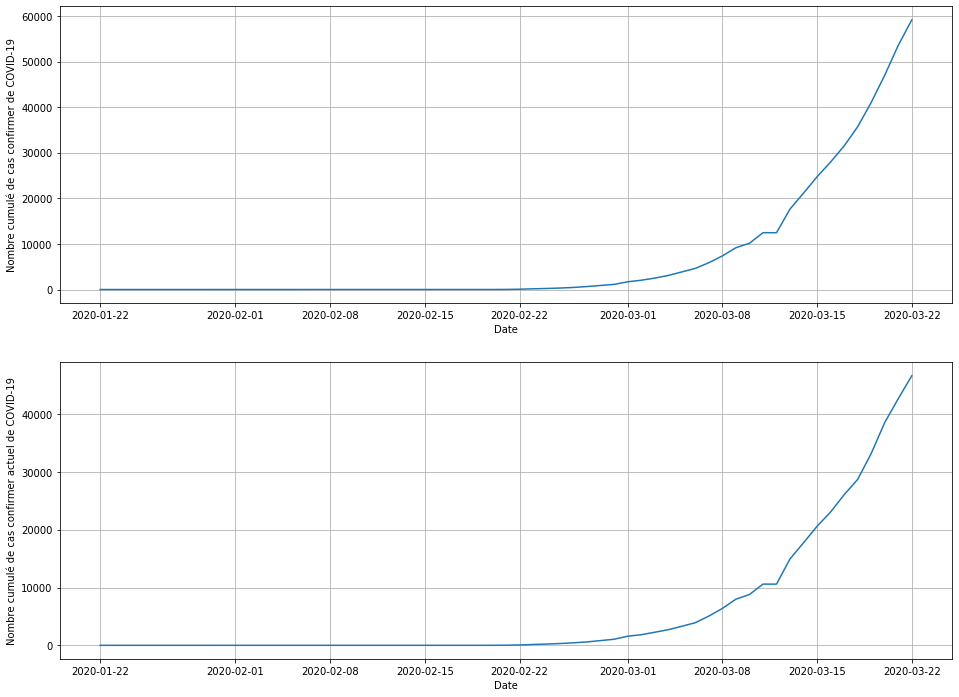

In [42]:
plt.figure(figsize=(16, 12))
Italia = Covid19.loc[Covid19['Country/Region'] == 'Italy', ['Date', 'Confirmed', 'Actual_Confirmed']].groupby(by='Date').sum()

plt.subplot(211)
plt.plot(Italia.Confirmed, label='Italy')
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer de COVID-19')

plt.subplot(212)
plt.plot(Italia.Actual_Confirmed, label='Italy')
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer actuel de COVID-19')


Les deux courbes ci-dessus montre qu'il y a toujours plus de cas en Italie ça montre que malgré tout les efforts prie par le gouvernement italien ces mesures ne suffisent pas contrairement à l'exemple chinois.

### France

Text(0, 0.5, 'Nombre cumulé de cas confirmer actuel de COVID-19')

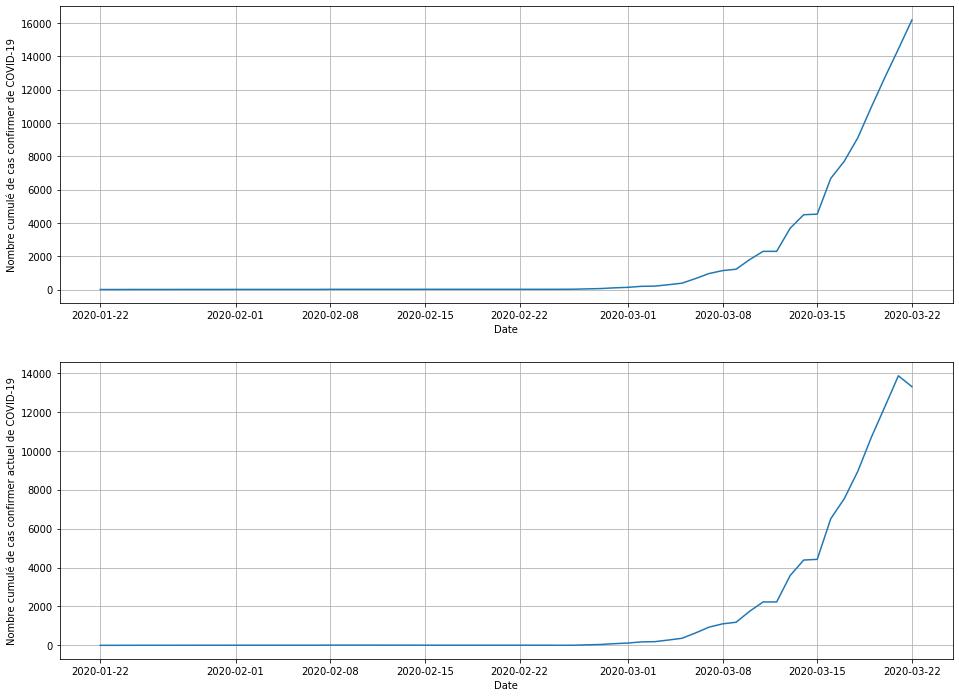

In [79]:
plt.figure(figsize=(16, 12))
France = Covid19.loc[Covid19['Country/Region'] == 'France', ['Date', 'Confirmed', 'Actual_Confirmed']].groupby(by='Date').sum()

plt.subplot(211)
plt.plot(France.Confirmed, label='France')
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer de COVID-19')

plt.subplot(212)
plt.plot(France.Actual_Confirmed, label='France')
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer actuel de COVID-19')


Les figures ci-dessus montre des courbes similaire aux courbes relative a la situation en italien. La seconde courbe montre une baise du nombre de personne contaminé ce qui indique que la France a possiblement atteint pique épidémique.

### Algérie

Que pouvons-nous dire de la situation en Algérie ? Selon les Courbes ci-dessous.

Text(0, 0.5, 'Nombre cumulé de cas confirmer actuel de COVID-19')

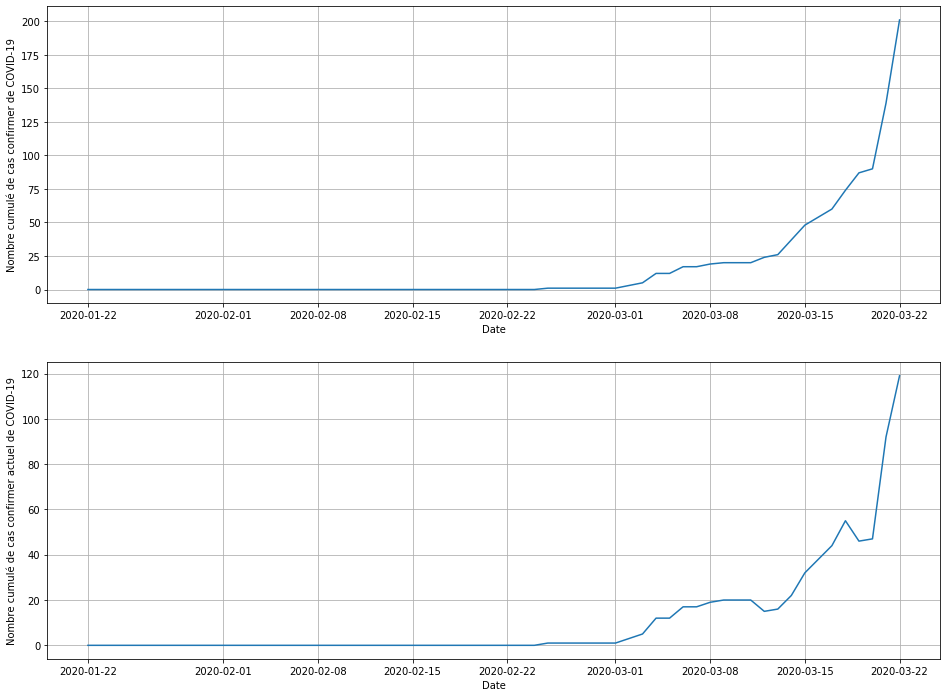

In [44]:
plt.figure(figsize=(16, 12))
Algeria = Covid19.loc[Covid19['Country/Region'] == 'Algeria', ['Date', 'Confirmed', 'Actual_Confirmed']].groupby(by='Date').sum()

plt.subplot(211)
plt.plot(Algeria.Confirmed, label='Algeria')
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer de COVID-19')

plt.subplot(212)
plt.plot(Algeria.Actual_Confirmed, label='Algeria')
plt.grid(b=True, axis = 'both')
plt.xlabel('Date')
plt.ylabel('Nombre cumulé de cas confirmer actuel de COVID-19')
